# Contexto

A Insurance All é uma empresa que fornece seguro de saúde para seus clientes e o time de produtos está analisando a possibilidade de oferecer aos assegurados, um novo produto: Um seguro de automóveis. Assim como o seguro de saúde, os clientes desse novo plano de seguro de automóveis precisam pagar um valor anualmente à Insurance All para obter um valor assegurado pela empresa, destinado aos custos de um eventual acidente ou dano ao veículo. A Insurance All fez uma pesquisa com cerca de 380 mil clientes sobre o interesse em aderir a um novo produto de seguro de automóveis, no ano passado. Todos os clientes demonstraram interesse ou não em adquirir o seguro de automóvel e essas respostas ficaram salvas em um banco de dados junto com outros atributos dos clientes. O time de produtos selecionou 127 mil novos clientes que não responderam a pesquisa para participar de uma campanha, no qual receberão a oferta do novo produto de seguro de automóveis. A oferta será feita pelo time de vendas através de ligações telefônicas. Contudo, o time de vendas tem uma capacidade de realizar 20 mil ligações dentro do período da campanha.

##  Desafio

Nesse contexto, você foi contratado como um consultor de Ciência de Dados para construir um modelo que prediz se o cliente estaria ou não interessado no seguro de automóvel.

Com a sua solução, o time de vendas espera conseguir priorizar as pessoas com maior interesse no novo produto e assim, otimizar a campanha realizando apenas contatos aos clientes mais propensos a realizar a compra.

Como resultado da sua consultoria, você precisará entregar um relatório contendo algumas análises e respostas às seguintes perguntas:

Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel. Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações? E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar? Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel? Os Dados O conjunto de dados está disponível na plataforma do Kaggle, através desse link: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

Cada linha representa um cliente e cada coluna contém alguns atributos que descrevem esse cliente, além da sua resposta à pesquisa, na qual ela mencionou interesse ou não ao novo produto de seguros.

O conjunto de dados inclui as seguintes informações:

Id: identificador único do cliente.

Gender: gênero do cliente.

Age: idade do cliente.

Driving License: 0, o cliente não tem permissão para dirigir e 1, o cliente tem para dirigir ( CNH – Carteira Nacional de Habilitação )

Region Code: código da região do cliente.

Previously Insured: 0, o cliente não tem seguro de automóvel e 1, o cliente já tem seguro de automóvel.

Vehicle Age: idade do veículo.

Vehicle Damage: 0, cliente nunca teve seu veículo danificado no passado e 1, cliente já teve seu veículo danificado no passado.

Anual Premium: quantidade que o cliente pagou à empresa pelo seguro de saúde anual.

Policy sales channel: código anônimo para o canal de contato com o cliente.

Vintage: número de dias que o cliente se associou à empresa através da compra do seguro de saúde.

Response: 0, o cliente não tem interesse e 1, o cliente tem interesse.

##  Soluçao
- Explore os Dados usando ferramentas e testes Estatísticos com o objetivo de encontrar inconsistências dos dados e tratar possíveis dados faltantes. 
- Levante Hipóteses sobre as características de transações legítimas e fraudulentas. Valide ou refute essas hipóteses através dos dados. 
- Prepare os Dados para que os Algoritmos Estatísticos ou de Machine Learning sejam capazes de aprender a tarefa. 
- Escreva vários algoritmos Classificadores. Contabilize a Performance do Modelo de Machine Learning e transforme em Performance de Negócio. 
- Desenvolva uma API que retorne um “Score de Propensão” de compra para cada cliente, ou seja, uma probabilidade do cliente estar interessado em comprar um seguro de automóvel. 
- Crie um README sobre como interpretar e usar a sua solução. Escreva um Relatório, respondendo às perguntas de negócio.
    
##  Próximos passos

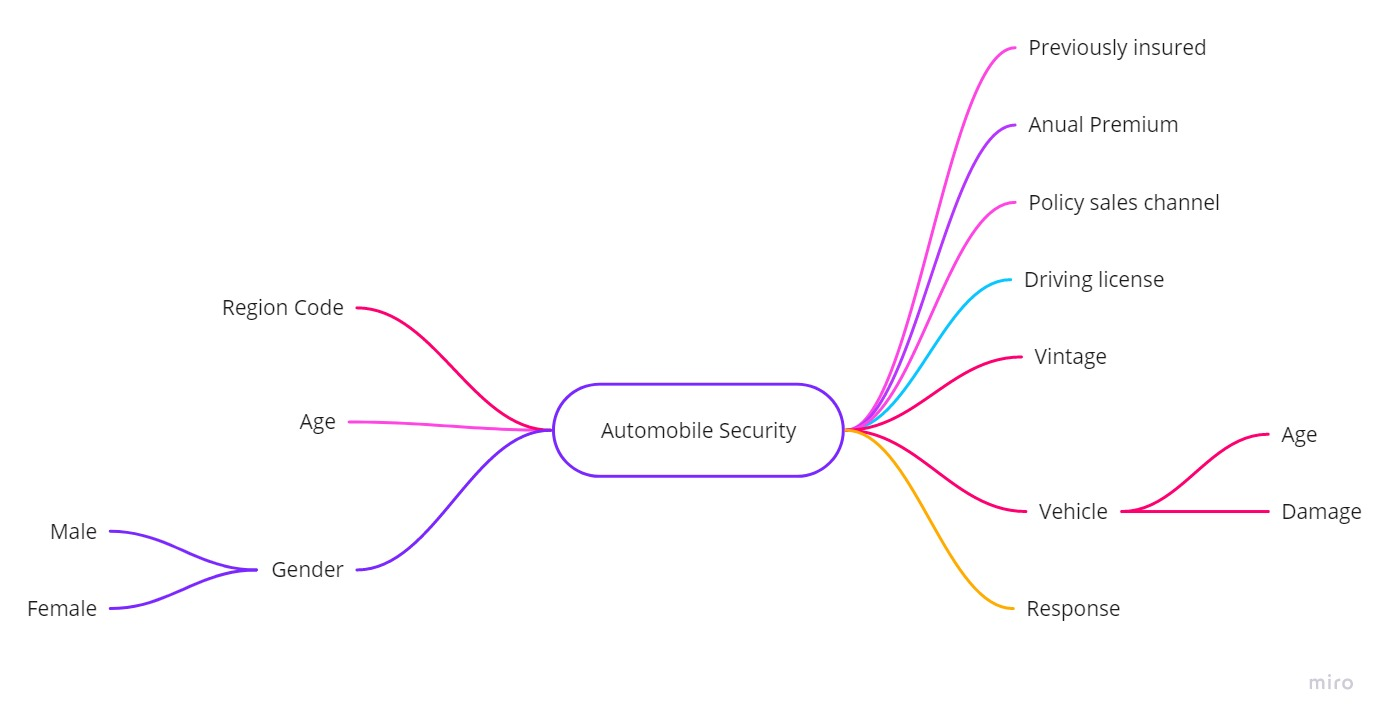

In [59]:
Image('Mind Map.jpg')

# 0. Imports

## 0.1. Libraries

In [1]:
# jupyter core
from IPython.core.display      import display, HTML
from IPython.display           import Image

# data imports
import pandas.io.sql as psql
import psycopg2 as pg

# data manipulation
import inflection
import datetime
import math
import random
import numpy as np
import pandas as pd
from scipy import stats as ss

# EDA
import pandas_profiling as pr
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

# preprocessing and ml
from sklearn import preprocessing as pp
from sklearn import linear_model as lm
from sklearn import model_selection as ms
from sklearn import ensemble as en
from sklearn import neighbors as nh

# feature selection
import boruta as bt

## 0.2. Helper Functions

In [2]:
# jupyter setup
def jupyter_settings():
    
    # jupyter core settings
    display(HTML("<style>.container { width:100% !important; }</style>"))
    !pylab inline
    
    # pandas
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.expand_frame_repr', False)
    
    # matplotlib
    !matplotlib inline
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 18
    
    # seaborn
    sns.set()

# 
def num_analysis(num_attributes):
    # Cemtral tendency - mean, median
    ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
    ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

    # Dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(num_attributes.apply(np.std)).T
    d2 = pd.DataFrame(num_attributes.apply(min)).T
    d3 = pd.DataFrame(num_attributes.apply(max)).T
    d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

    # concatenate
    m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
    m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis',]
    
    # histogram
    hist = num_attributes.hist(bins=30)
    
    return m

    return hist

In [3]:
jupyter_settings()

'pylab' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.
'matplotlib' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


## 0.3. Data

#### Testing schemas

In [8]:
# credentials
host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
port = 5432
database = 'comunidadedsdb'
username = 'member'
pwd = 'cdspa'

# Check database - connect to an existing dataset
conn = pg.connect(database=database, user=username, password=pwd, host=host, port=port)
conn

<connection object at 0x00000255996158C0; dsn: 'user=member password=xxx dbname=comunidadedsdb host=comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com port=5432', closed: 0>

In [11]:
# create a cursos to perform database operations
cursor = conn.cursor()

# take a look at schemas
query_schema = 'SELECT nspname FROM pg_catalog.pg_namespace'

In [14]:
# execute schema
cursor.execute(query_schema)

# fetch all and print
record = cursor.fetchall()
print(record)

# connection close
cursor.close()
conn.close()

[('pg_toast',), ('pg_temp_1',), ('pg_toast_temp_1',), ('pg_catalog',), ('information_schema',), ('public',), ('pa004',)]


#### Testing tables

In [18]:
# credentials
host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
port = 5432
database = 'comunidadedsdb'
username = 'member'
pwd = 'cdspa'

# Check database - connect to an existing dataset
conn = pg.connect(database=database, user=username, password=pwd, host=host, port=port)

# create a curor to perform database operations
cursor = conn.cursor()

# take a look at schemas
query_tables = """SELECT tablename FROM pg_tables WHERE schemaname='pa004'"""

# cursos execute
cursor.execute(query_tables)

# cursor fetchall and print
record = cursor.fetchall()
print(record)

# close connection
cursor.close()
conn.close()

[('users',), ('vehicle',), ('insurance',)]


### Collect data from psycopg2

In [24]:
# credentials
host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
port = 5432
database = 'comunidadedsdb'
username = 'member'
pwd = 'cdspa'

# Check database - connect to an existing dataset
conn = pg.connect(database=database, user=username, password=pwd, host=host, port=port)

# create a curor to perform database operations
cursor = conn.cursor()

# take a look at schemas
query_table_users = """SELECT * FROM pa004.users LIMIT 10;"""

# cursos execute
cursor.execute(query_table_users)

# cursor fetchall and print
record = cursor.fetchall()
print(record)

# close connection
#cursor.close()
#conn.close()

[(1, 'Male', 44, 28.0, 26.0), (2, 'Male', 76, 3.0, 26.0), (3, 'Male', 47, 28.0, 26.0), (4, 'Male', 21, 11.0, 152.0), (5, 'Female', 29, 41.0, 152.0), (6, 'Female', 24, 33.0, 160.0), (7, 'Male', 23, 11.0, 152.0), (8, 'Female', 56, 28.0, 26.0), (9, 'Female', 24, 3.0, 152.0), (10, 'Female', 32, 6.0, 152.0)]


In [25]:
data = pd.DataFrame(record)
data

,0,1,2,3,4
0,1,Male,44,28.0,26.0
1,2,Male,76,3.0,26.0
2,3,Male,47,28.0,26.0
3,4,Male,21,11.0,152.0
4,5,Female,29,41.0,152.0
5,6,Female,24,33.0,160.0
6,7,Male,23,11.0,152.0
7,8,Female,56,28.0,26.0
8,9,Female,24,3.0,152.0
9,10,Female,32,6.0,152.0


### Collect data with Pandas

In [26]:
df = psql.read_sql('SELECT * FROM pa004.users LIMIT 10', conn)
df

,id,gender,age,region_code,policy_sales_channel
0,1,Male,44,28.0,26.0
1,2,Male,76,3.0,26.0
2,3,Male,47,28.0,26.0
3,4,Male,21,11.0,152.0
4,5,Female,29,41.0,152.0
5,6,Female,24,33.0,160.0
6,7,Male,23,11.0,152.0
7,8,Female,56,28.0,26.0
8,9,Female,24,3.0,152.0
9,10,Female,32,6.0,152.0


### Raw Data

In [8]:
# credentials
host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
port = 5432
database = 'comunidadedsdb'
username = 'member'
pwd = 'cdspa'

# Check database - connect to an existing dataset
conn = pg.connect(database=database, user=username, password=pwd, host=host, port=port)

# query
query_data = """
                SELECT *
                FROM pa004.users u INNER JOIN pa004.vehicle   v   ON (u.id = v.id)
                                   INNER JOIN pa004.insurance i   ON (u.id = i.id)
"""

df = psql.read_sql(query_data, conn)
df_raw = df.drop(df.columns[[5,9]], axis=1)

In [9]:
df_raw.head()

,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,Male,23,11.0,152.0,1,< 1 Year,Yes,0,23367.0,249,0
1,Female,41,15.0,14.0,1,1-2 Year,No,1,31409.0,221,0
2,Female,25,35.0,152.0,1,< 1 Year,No,1,46622.0,299,0
3,Female,26,8.0,160.0,1,< 1 Year,No,0,2630.0,136,0
4,Male,45,8.0,124.0,1,1-2 Year,Yes,0,42297.0,264,0


In [10]:
# df_raw.to_csv('df_raw.csv')

# 1. Data Description

In [4]:
# df1 = df_raw.copy()
df1 = pd.read_csv('df_raw.csv')

In [5]:
df1.head()

,Unnamed: 0,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,0,Male,23,11.0,152.0,1,< 1 Year,Yes,0,23367.0,249,0
1,1,Female,41,15.0,14.0,1,1-2 Year,No,1,31409.0,221,0
2,2,Female,25,35.0,152.0,1,< 1 Year,No,1,46622.0,299,0
3,3,Female,26,8.0,160.0,1,< 1 Year,No,0,2630.0,136,0
4,4,Male,45,8.0,124.0,1,1-2 Year,Yes,0,42297.0,264,0


In [6]:
df1.columns = ['id', 'gender', 'age', 'region_code', 'policy_sales_channel', 'driving_license', 'vehicle_age', 'vehicle_damage', 'previously_insured', 'annual_premium', 'vintage', 'response']

In [7]:
print('Number of rows: ', df1.shape[0])
print('Number of columns: ', df1.shape[1])

Number of rows:  381109
Number of columns:  12


In [8]:
df1.dtypes

# objects: gender, driving_license, vehicle_age, vehicle_damage, previously_insured, response

# gender                   object
# age                       int64
# region_code             float64
# policy_sales_channel    float64
# driving_license           int64 obj
# vehicle_age              object obj
# vehicle_damage           object obj
# previously_insured        int64 obj
# annual_premium          float64
# vintage                   int64
# response                  int64 obj

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

In [9]:
df1.columns.tolist()

['id',
 'gender',
 'age',
 'region_code',
 'policy_sales_channel',
 'driving_license',
 'vehicle_age',
 'vehicle_damage',
 'previously_insured',
 'annual_premium',
 'vintage',
 'response']

In [10]:
df1.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

In [11]:
df1['vehicle_age'].unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [12]:
# vahicle age
# df1['vehicle_age'] = df1['vehicle_age'].apply(lambda x: 0 if x=='< 1 Year' else 1 if x=='1-2 Year' else 2)

# vehicle damage
# df1['vehicle_damage'] = df1['vehicle_damage'].apply(lambda x: 0 if x=='No' else 1)

In [13]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64'])

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,0.0,381108.0,381108.0,190554.000000,190554.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
3,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
4,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
5,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
6,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


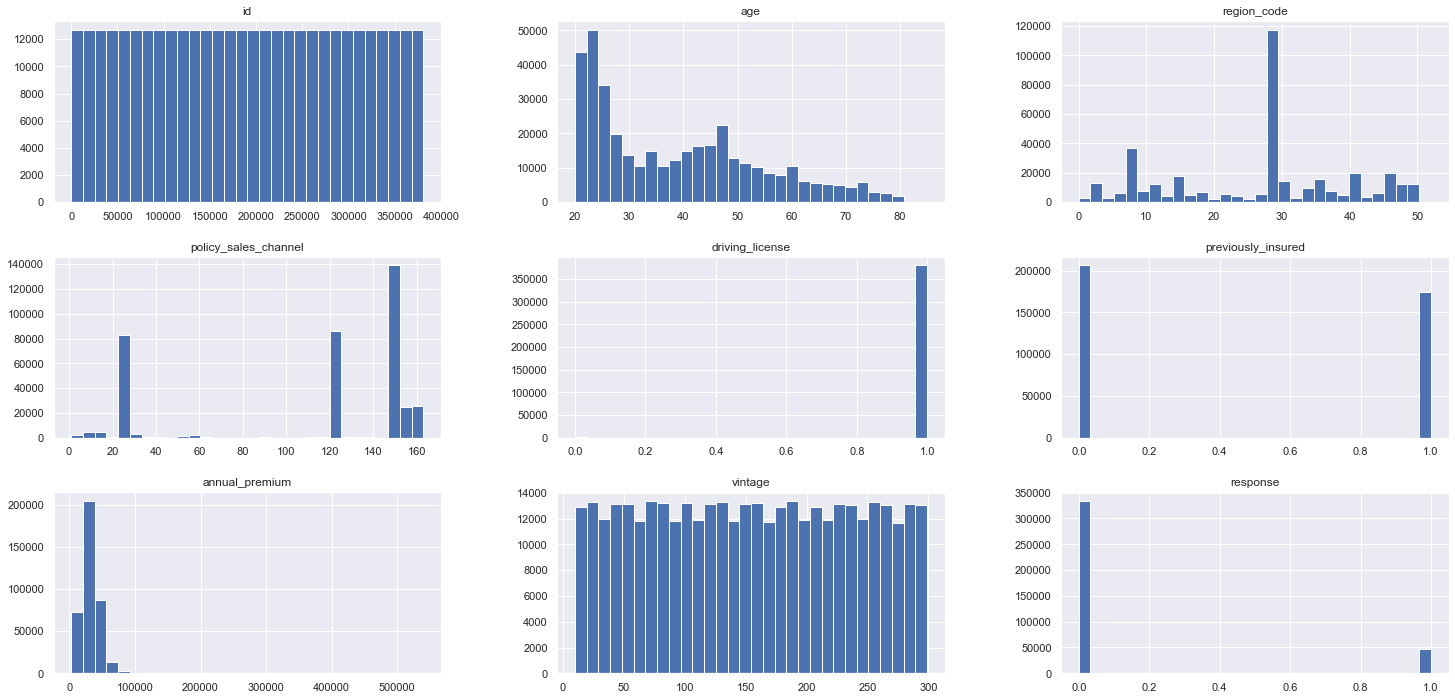

In [14]:
num_analysis(num_attributes)

# Id: identificador único do cliente.

# Gender: gênero do cliente.

# Age: idade do cliente.

# Driving License: 0, o cliente não tem permissão para dirigir e 1, o cliente tem para dirigir ( CNH – Carteira Nacional de Habilitação )

# Region Code: código da região do cliente.

# Previously Insured: 0, o cliente não tem seguro de automóvel e 1, o cliente já tem seguro de automóvel.

# Vehicle Age: idade do veículo.

# Vehicle Damage: 0, cliente nunca teve seu veículo danificado no passado e 1, cliente já teve seu veículo danificado no passado.

# Anual Premium: quantidade que o cliente pagou à empresa pelo seguro de saúde anual.

# Policy sales channel: código anônimo para o canal de contato com o cliente.

# Vintage: número de dias que o cliente se associou à empresa através da compra do seguro de saúde.

# Response: 0, o cliente não tem interesse e 1, o cliente tem interesse.

In [15]:
cat_attributes.apply(lambda x: x.unique().shape)

,gender,vehicle_age,vehicle_damage
0,2,3,2


### Driving license and interest in insurance

*  only 0.002% do not own a driving license, which makes this feature so unbbalanced that it doesn´t contribute to the modelling of the fenomenon

* 41 clients DO NOT have a permission to drive but still manifested interest in insurance. May configure a case of incoherent data, which may or may not be taken into account in the modelling

In [16]:
df1['driving_license'].value_counts() / len(df1['driving_license'])

1    0.997869
0    0.002131
Name: driving_license, dtype: float64

In [17]:
df1[(df1['driving_license'] == 0) & df1['response'] == 1].count()

id                      41
gender                  41
age                     41
region_code             41
policy_sales_channel    41
driving_license         41
vehicle_age             41
vehicle_damage          41
previously_insured      41
annual_premium          41
vintage                 41
response                41
dtype: int64

### Annual premium outliers

* from 381109 id's there is a small number of people with high annual premium values

In [18]:
df1[(df1['annual_premium'] > 100000)].count()

id                      778
gender                  778
age                     778
region_code             778
policy_sales_channel    778
driving_license         778
vehicle_age             778
vehicle_damage          778
previously_insured      778
annual_premium          778
vintage                 778
response                778
dtype: int64

In [19]:
df1[(df1['annual_premium'] > 200000)].count()

id                      112
gender                  112
age                     112
region_code             112
policy_sales_channel    112
driving_license         112
vehicle_age             112
vehicle_damage          112
previously_insured      112
annual_premium          112
vintage                 112
response                112
dtype: int64

In [20]:
df1[(df1['annual_premium'] > 300000)].count()

id                      51
gender                  51
age                     51
region_code             51
policy_sales_channel    51
driving_license         51
vehicle_age             51
vehicle_damage          51
previously_insured      51
annual_premium          51
vintage                 51
response                51
dtype: int64

# 2. Feature Engineering

In [21]:
df2 = df1.copy()

In [22]:
# vehicle age
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_year' if x == '1-2 Year' else 'below_1_year')

# vehicle damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 0 if x=='No' else 1)


# 3. Filter

In [23]:
df3 = df2.copy()

# 4. EDA

In [24]:
df4 = df3.copy()

## 4.1. Univariate Analysis

In [25]:
df4.columns.tolist()

['id',
 'gender',
 'age',
 'region_code',
 'policy_sales_channel',
 'driving_license',
 'vehicle_age',
 'vehicle_damage',
 'previously_insured',
 'annual_premium',
 'vintage',
 'response']

### Age

* As age increases, the interest in buying insurance increases

<AxesSubplot:xlabel='response', ylabel='age'>

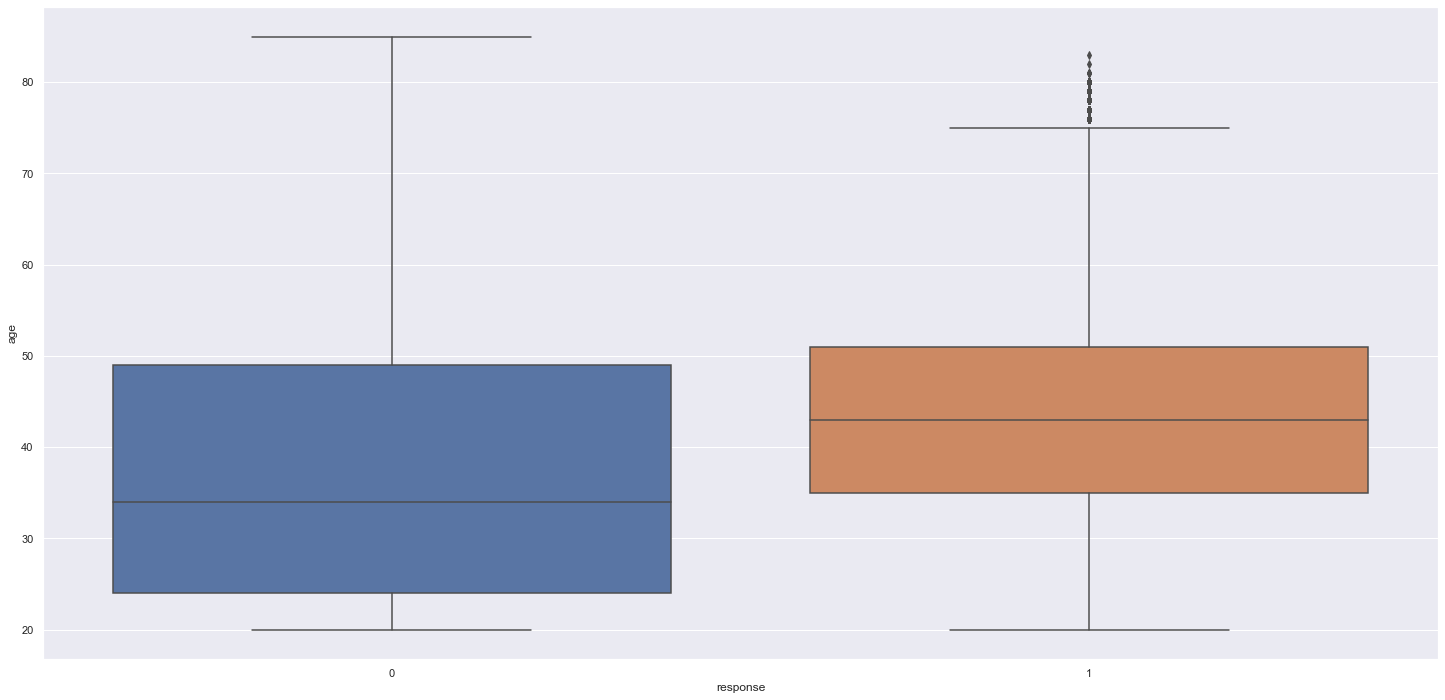

In [26]:
# age
sns.boxplot(x='response', y='age', data=df4)

# more interest in vehicle security as age increases

<AxesSubplot:xlabel='age', ylabel='Count'>

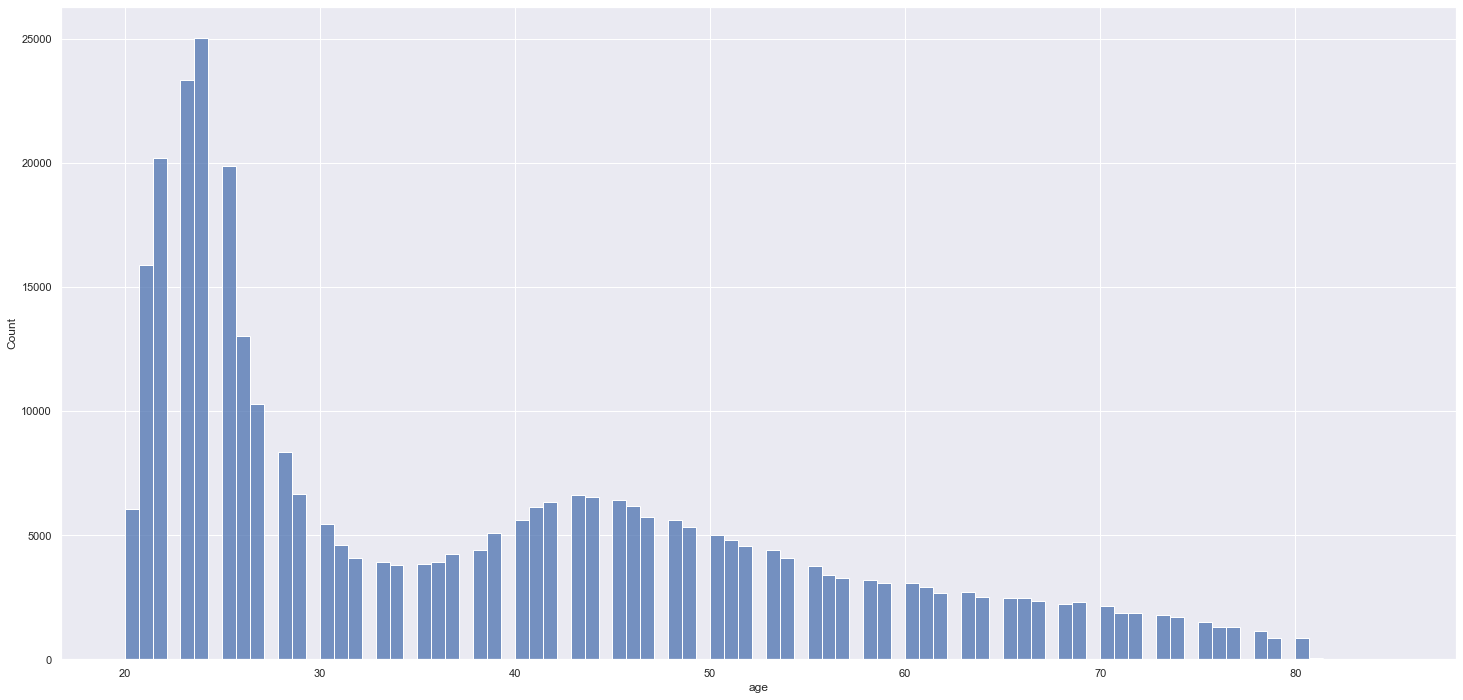

In [35]:
aux00 = df4.loc[df4['response'] == 0, 'age']
sns.histplot(aux00)

<AxesSubplot:xlabel='age', ylabel='Count'>

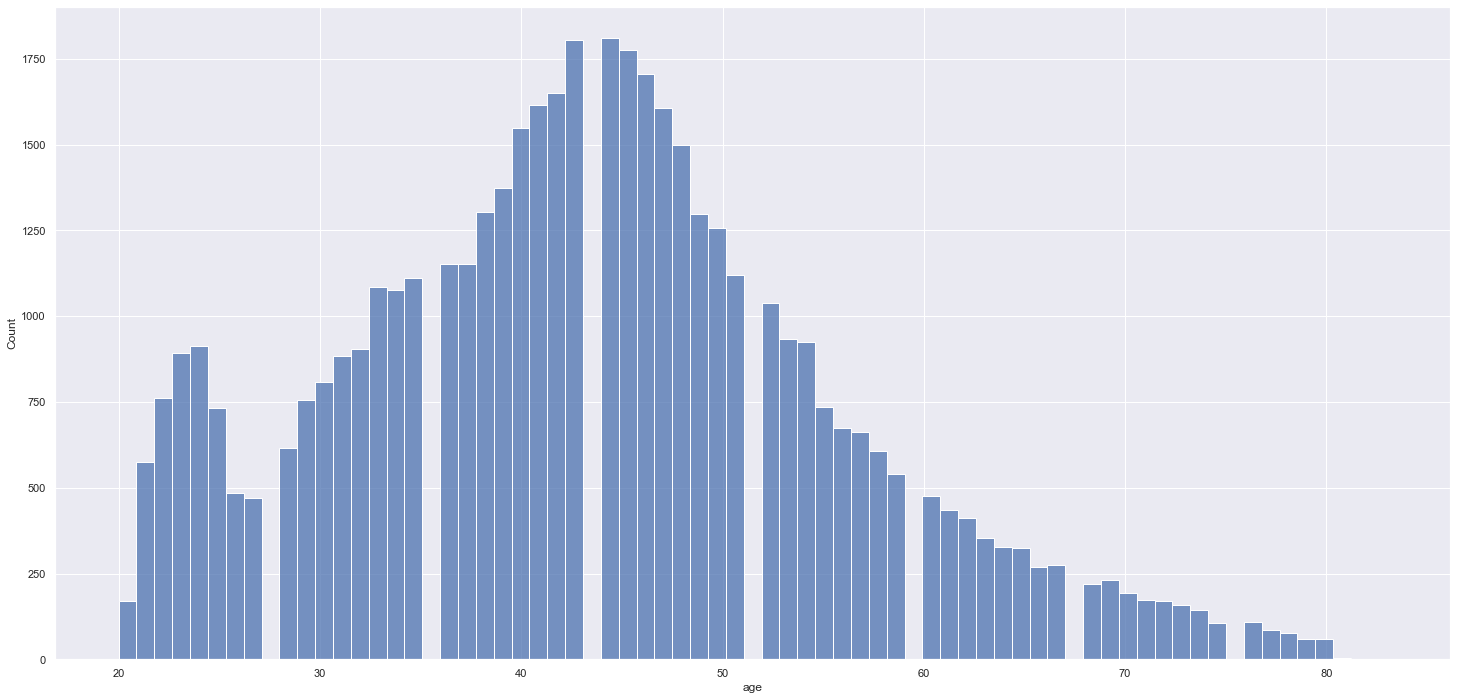

In [36]:
aux00 = df4.loc[df4['response'] == 1, 'age']
sns.histplot(aux00)

### Region code

* For certain region code the total of individuals interested in insurance varies.

<AxesSubplot:xlabel='region_code', ylabel='id'>

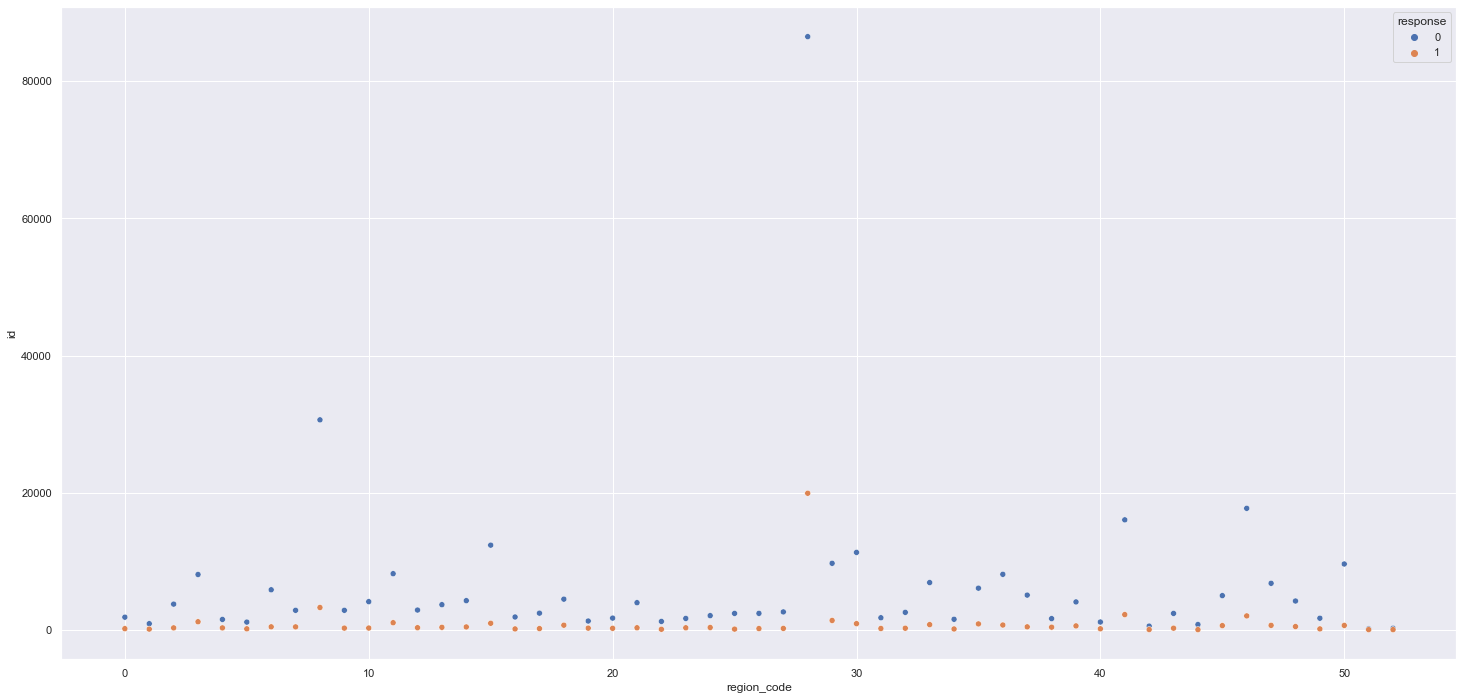

In [37]:
# region code
aux0 = df4[['id', 'region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()
sns.scatterplot(x='region_code', y='id',hue='response', data=aux0)

### Policy sales channel

<AxesSubplot:xlabel='response', ylabel='policy_sales_channel'>

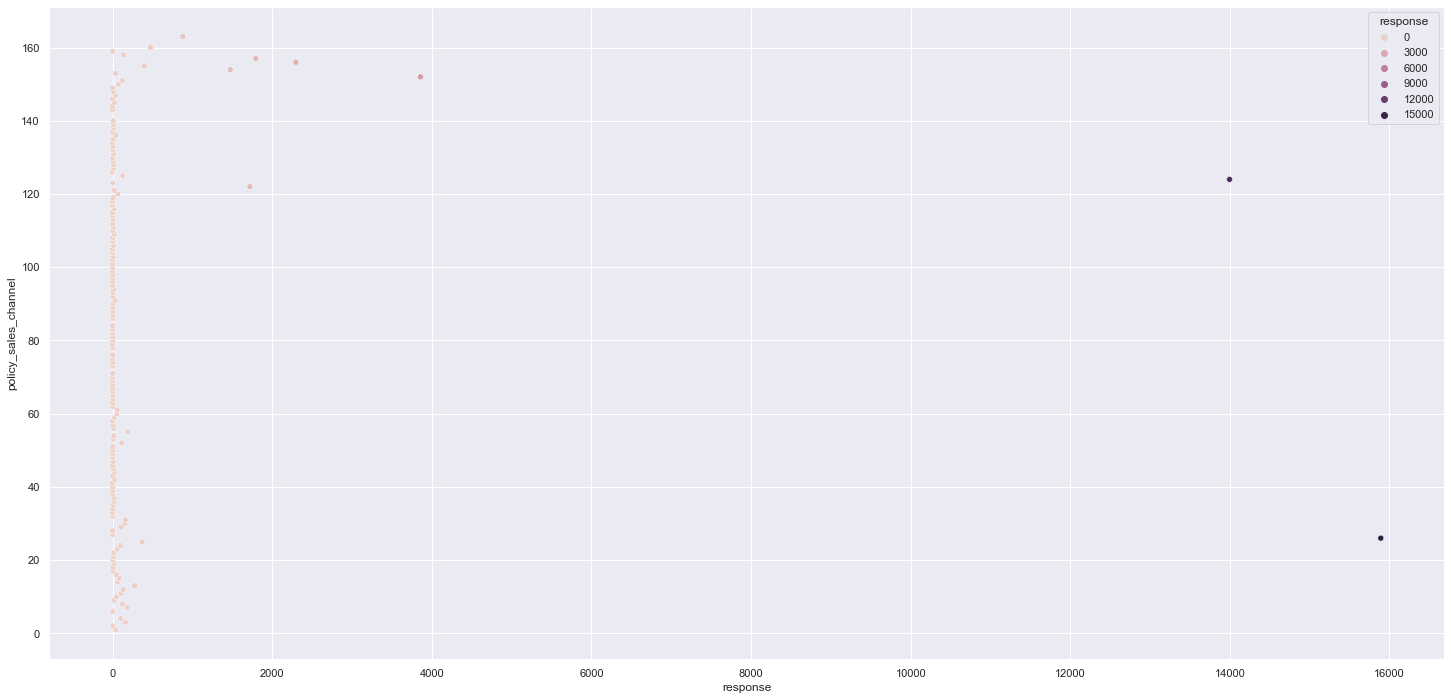

In [61]:
# policy_sales_channel
aux = df4[['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum().reset_index()
sns.scatterplot(x='response', y='policy_sales_channel', hue='response', data=aux)

### Driving license

* A few insights into the behaviour of people who have a driving license, their interest in insurance, and also people who do not have a driving license but for whatever reason might be interested in insurance.

In [27]:
df4['driving_license'].value_counts()

1    380297
0       812
Name: driving_license, dtype: int64

In [28]:
df4[(df4['driving_license'] == 0) & (df4['response'] == 1)].count()

id                      41
gender                  41
age                     41
region_code             41
policy_sales_channel    41
driving_license         41
vehicle_age             41
vehicle_damage          41
previously_insured      41
annual_premium          41
vintage                 41
response                41
dtype: int64

In [29]:
aux = df4[['driving_license', 'response']].groupby('response').sum().reset_index()
aux

,response,driving_license
0,0,333628
1,1,46669


In [30]:
aux['driving_license_perc'] = aux['driving_license']/aux['driving_license'].sum()
aux

# 87,7% of the people who do have a driving license is not interested in insurance

,response,driving_license,driving_license_perc
0,0,333628,0.877283
1,1,46669,0.122717


<AxesSubplot:xlabel='response', ylabel='driving_license'>

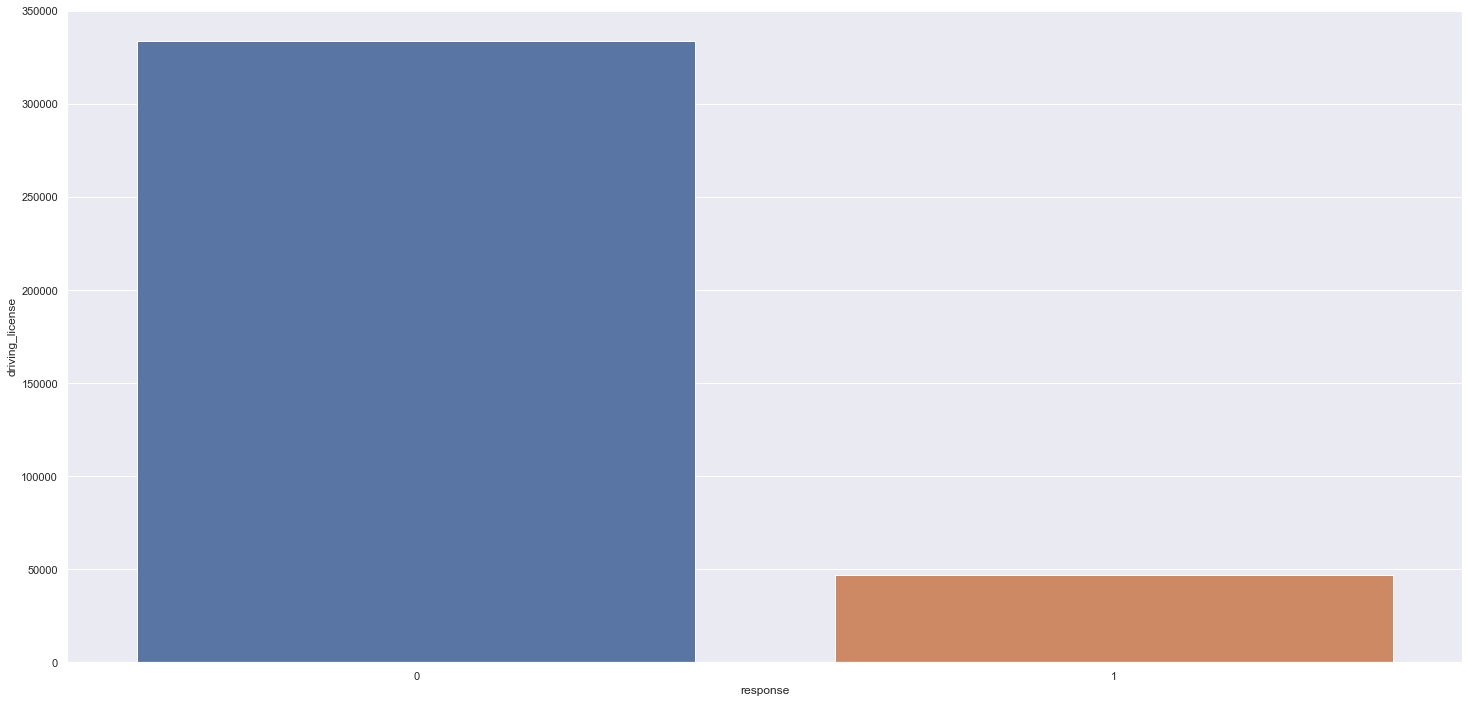

In [31]:
aux = df4[['driving_license', 'response']].groupby('response').sum().reset_index()
sns.barplot(x='response', y='driving_license', data=aux)

<AxesSubplot:xlabel='response', ylabel='driving_license'>

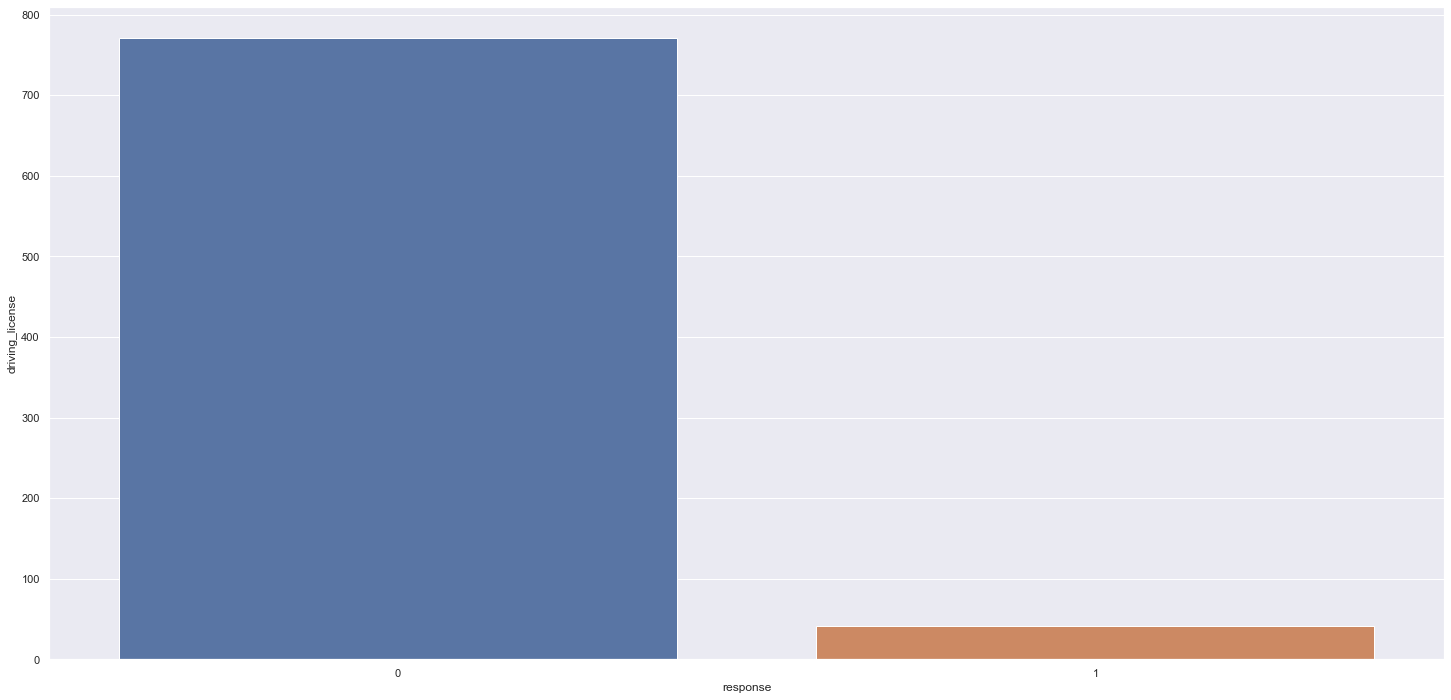

In [32]:
aux = df4[(df4['driving_license'] == 0)][['driving_license', 'response']].groupby('response').count().reset_index()
sns.barplot(x='response', y='driving_license', data=aux)

In [33]:
aux['driving_license_perc'] = aux['driving_license']/aux['driving_license'].sum()
aux

# 94,9% of people who do have a driving license is not interested in insurance

,response,driving_license,driving_license_perc
0,0,771,0.949507
1,1,41,0.050493


### Vehicle age

In [34]:
df4[['id','vehicle_age', 'response']].groupby(['vehicle_age', 'response']).count().reset_index()

,vehicle_age,response,id
0,below_1_year,0,157584
1,below_1_year,1,7202
2,between_1_2_year,0,165510
3,between_1_2_year,1,34806
4,over_2_years,0,11305
5,over_2_years,1,4702


### Vehicle damage

<AxesSubplot:xlabel='response', ylabel='vehicle_damage'>

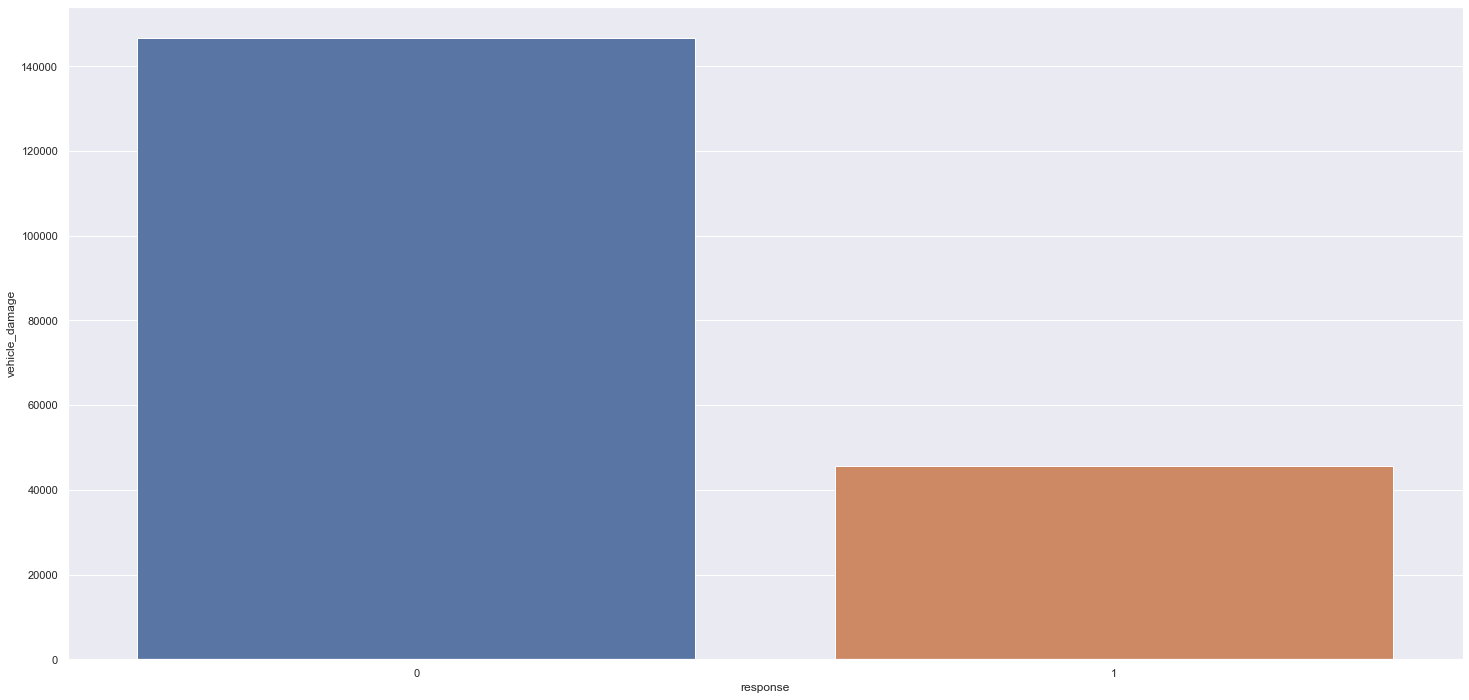

In [35]:
aux = df4[['vehicle_damage', 'response']].groupby('response').sum().reset_index()
sns.barplot(x='response', y='vehicle_damage', data=aux)

### Previously insured

<AxesSubplot:xlabel='previously_insured', ylabel='id'>

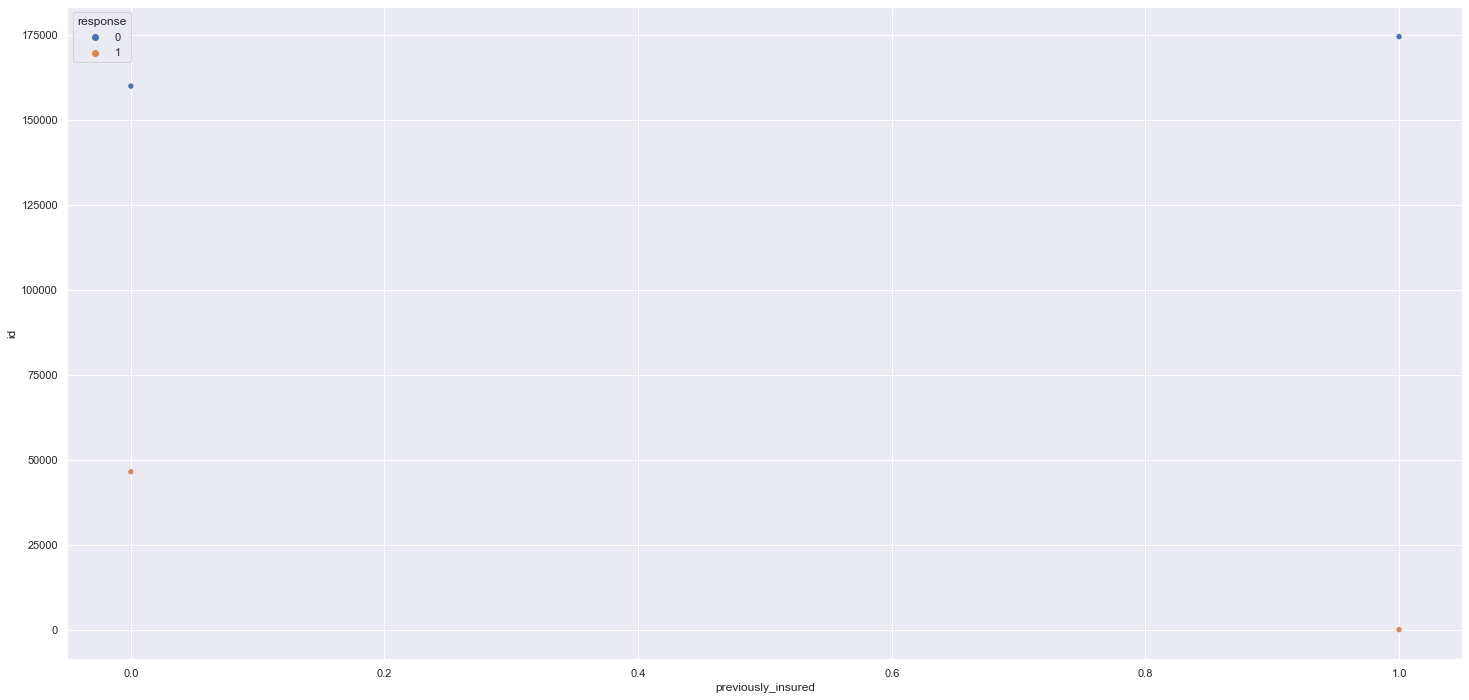

In [98]:
aux = df4[['id', 'previously_insured','response']].groupby(['previously_insured', 'response']).count().reset_index()

sns.scatterplot(x='previously_insured', y='id', hue='response', data=aux)

In [96]:
pd.crosstab(df4['previously_insured'], df4['response']).apply(lambda x: x/x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


<AxesSubplot:xlabel='response', ylabel='annual_premium'>

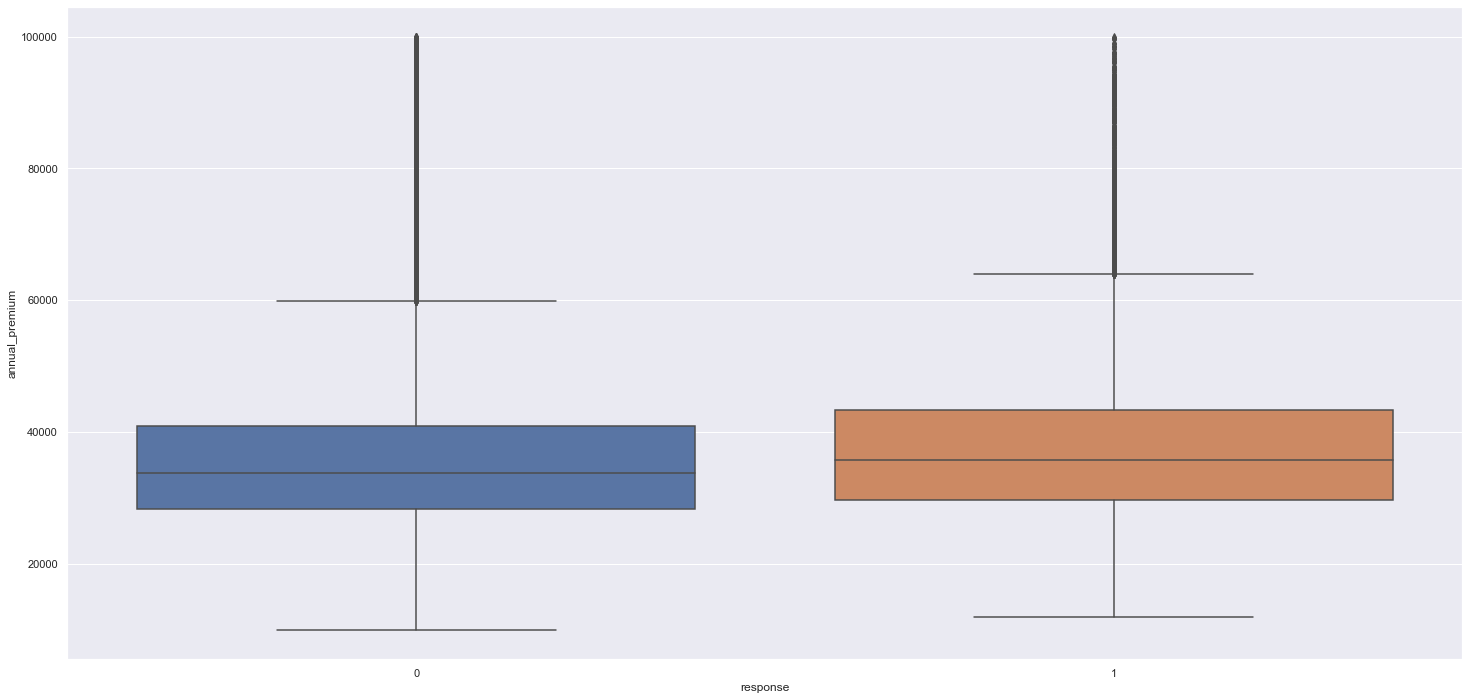

In [38]:
# annual_premium
aux = df4[(df4['annual_premium'] < 100000) & (df4['annual_premium'] > 10000)]
sns.boxplot(x='response', y='annual_premium', data=aux)

# 

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

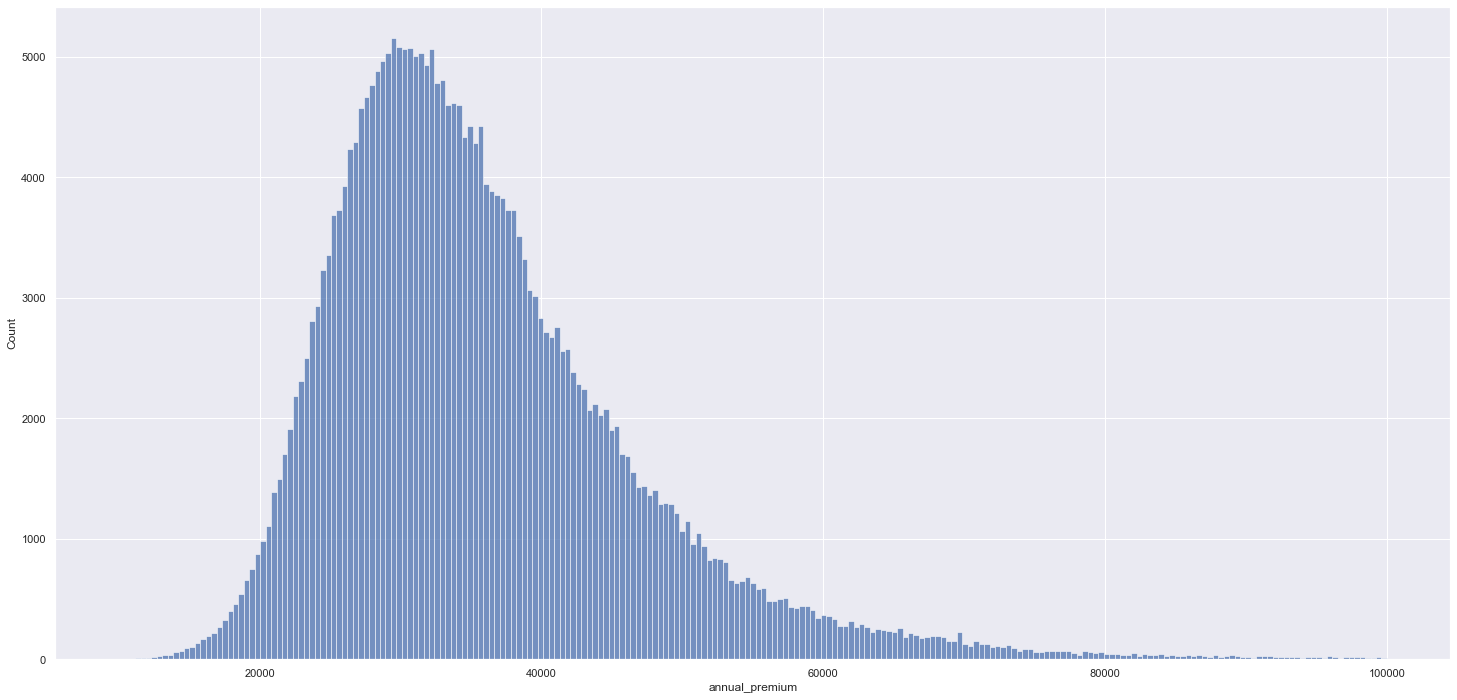

In [39]:
aux00 = aux.loc[aux['response'] == 0, 'annual_premium']
sns.histplot(aux00)

# pouco representativa em relação à variavel resposta, ja que nao varia dependendo da resposta

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

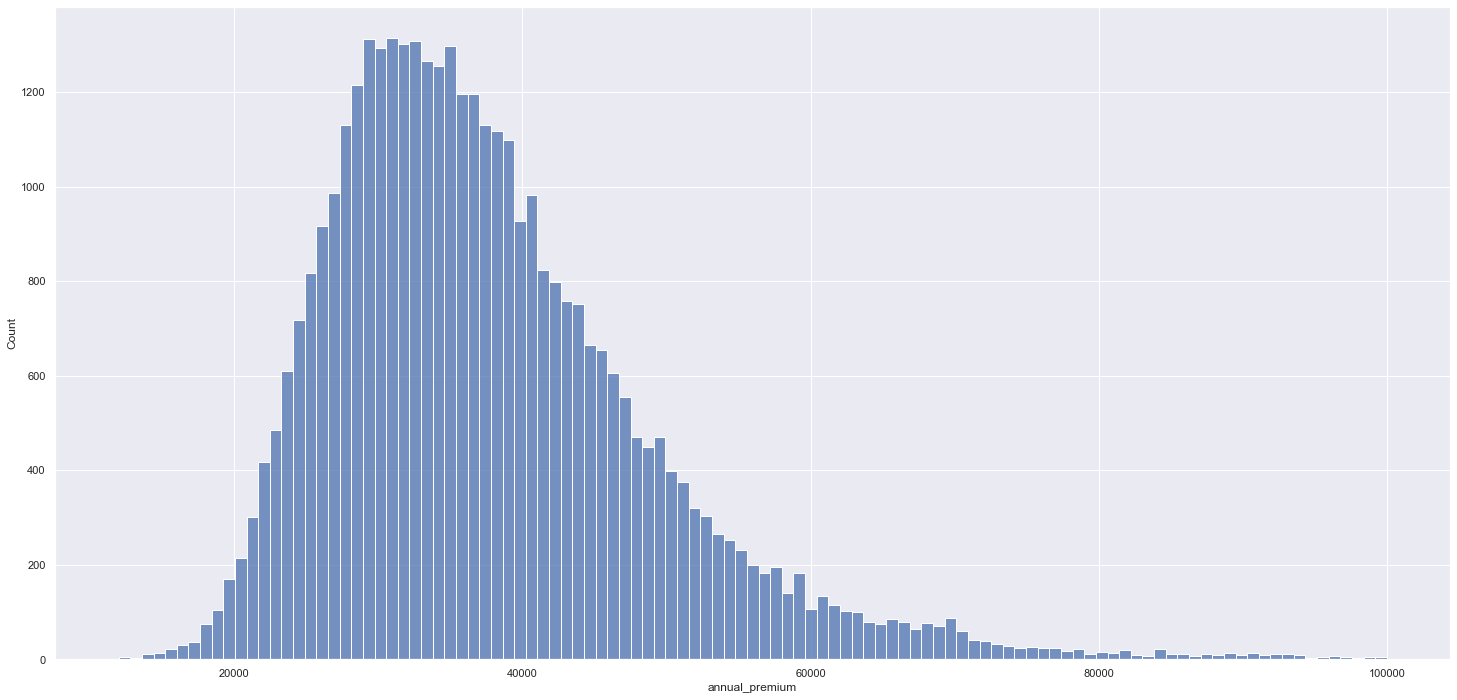

In [40]:
aux00 = aux.loc[aux['response'] == 1, 'annual_premium']
sns.histplot(aux00)

# pouco representativa em relação à variavel resposta, ja que nao varia dependendo da resposta

<AxesSubplot:xlabel='vintage', ylabel='Count'>

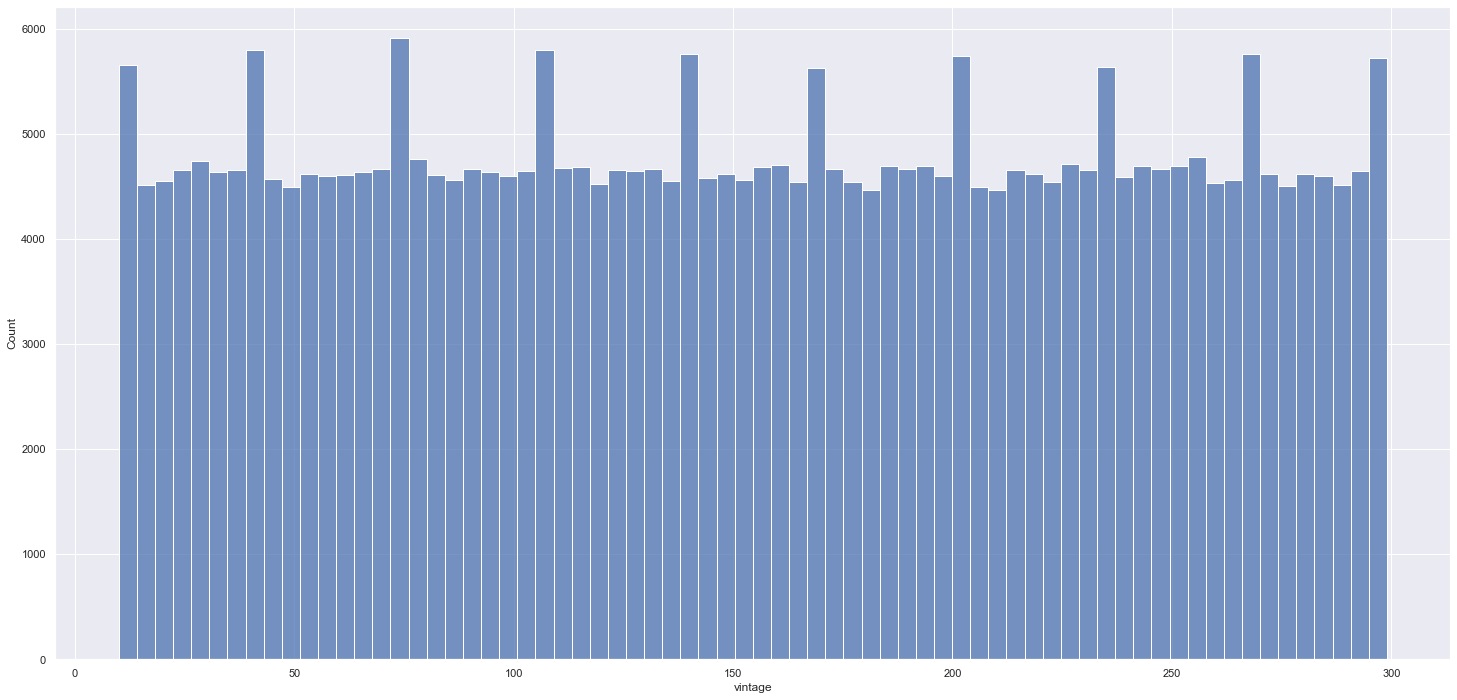

In [104]:
# vintage
sns.histplot(df4.loc[df4['response']==0, 'vintage'])

<AxesSubplot:xlabel='vintage', ylabel='Count'>

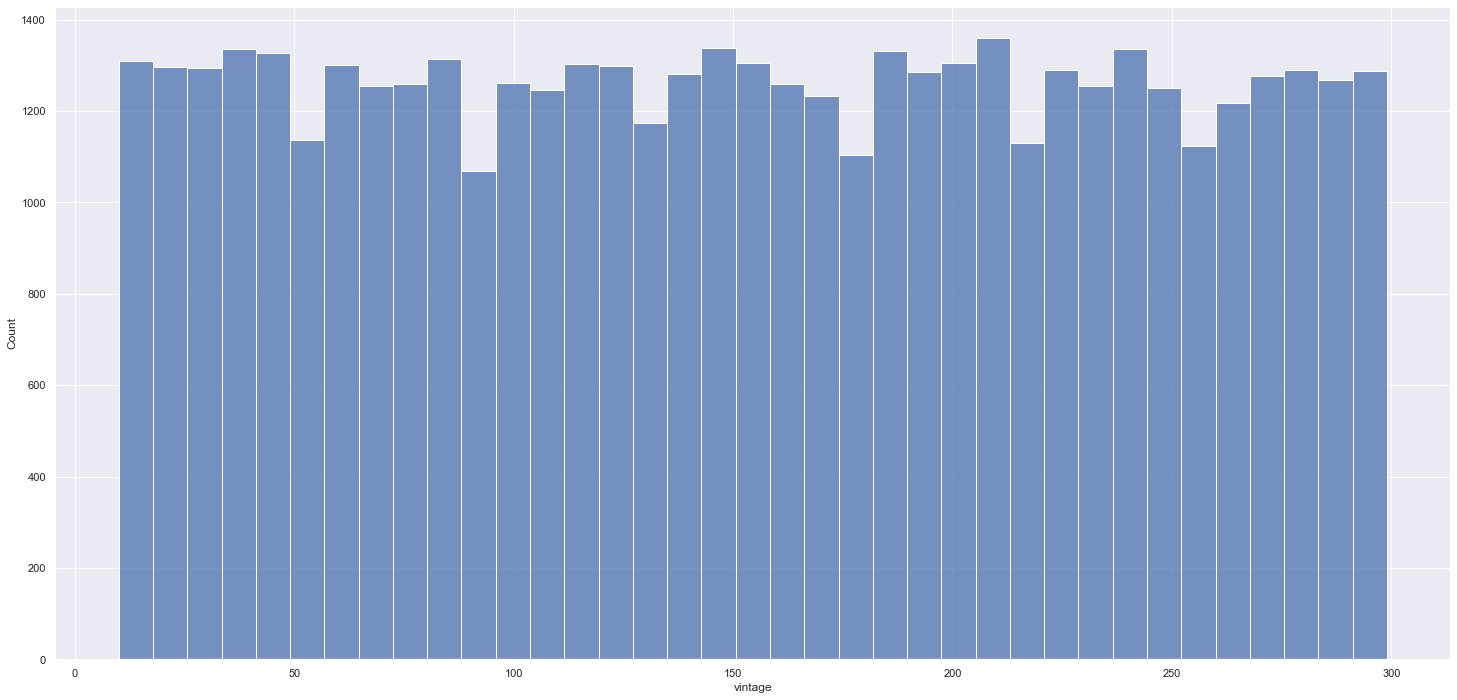

In [105]:
sns.histplot(df4.loc[df4['response']==1, 'vintage'])

In [110]:
aux = pd.pivot_table(index='vintage', columns='response', values='id', data=df4).reset_index()
aux.columns = ['vintage', 'no_response', 'yes_response']
aux

,vintage,no_response,yes_response
0,10,186374.172680,177273.401361
1,11,185296.439722,190481.534031
2,12,185538.119048,185936.860606
3,13,193496.947598,192557.190217
4,14,189856.851449,187514.288462
5,15,190100.637871,189416.261745
6,16,187378.564417,192674.528736
7,17,189794.601770,200490.812500
8,18,187481.995446,190268.364865
9,19,189125.655814,184327.111111


<AxesSubplot:xlabel='vintage'>

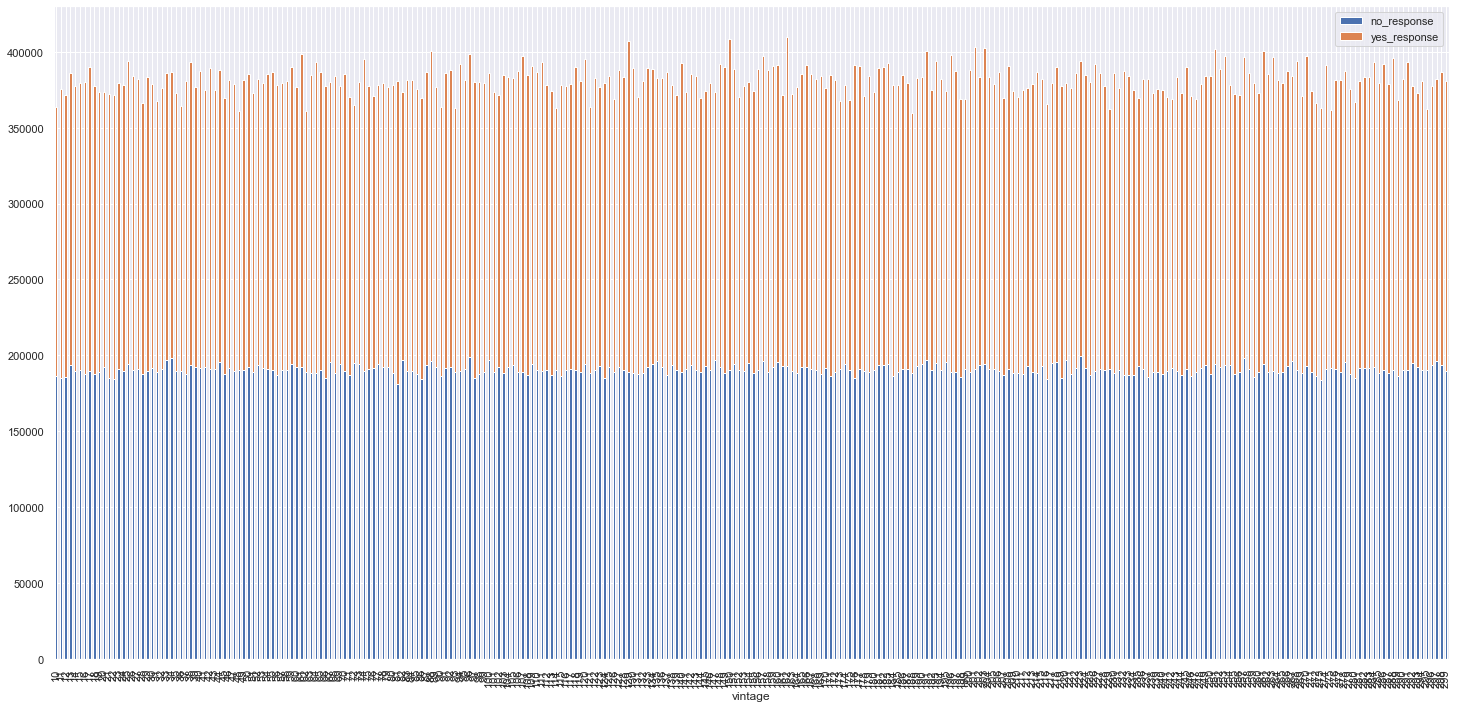

In [111]:
aux.plot(x='vintage', kind='bar', stacked=True)

# 5. Data preparation

In [36]:
# response column definition
X = df4.drop('response', axis=1)
y = df4['response'].copy()

# train-test split
x_train, x_val, y_train, y_val = ms.train_test_split(X, y, test_size=0.2)

# reuniting train
df5 = pd.concat([x_train, y_train], axis=1)
df5

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
279322,279322,Female,28,28.0,152.0,1,below_1_year,0,1,26433.0,146,0
55730,55730,Male,55,28.0,26.0,1,between_1_2_year,0,0,35892.0,135,0
54486,54486,Male,24,14.0,152.0,1,below_1_year,0,1,32175.0,273,0
263452,263452,Male,20,8.0,156.0,1,between_1_2_year,1,0,2630.0,48,0
282337,282337,Male,22,28.0,154.0,1,below_1_year,1,0,23330.0,139,1
...,...,...,...,...,...,...,...,...,...,...,...,...
66686,66686,Female,46,26.0,26.0,1,between_1_2_year,0,1,2630.0,283,0
201336,201336,Female,43,8.0,19.0,1,between_1_2_year,0,1,40552.0,94,0
152382,152382,Male,58,38.0,124.0,1,between_1_2_year,1,0,26588.0,148,0
65524,65524,Female,26,19.0,152.0,1,below_1_year,0,1,30295.0,158,0


### Standardization

In [37]:
ss = pp.StandardScaler()
df5['annual_premium'] = ss.fit_transform(df5[['annual_premium']].values)

### Rescaling

In [38]:
# rescaling
mms = pp.MinMaxScaler()
df5['age'] = mms.fit_transform(df5[['age']].values)
df5['vintage'] = mms.fit_transform(df5[['vintage']].values)

### Transformation

In [39]:
# region code
target_encode_region_code = df5.groupby('region_code')['response'].mean()
df5['region_code'].map(target_encode_region_code)

279322    0.186967
55730     0.186967
54486     0.091425
263452    0.096964
282337    0.186967
            ...   
66686     0.071290
201336    0.096964
152382    0.191707
65524     0.164239
163461    0.121438
Name: region_code, Length: 304887, dtype: float64

In [40]:
## encoding
# gender
target_encode_gender = df5.groupby('gender')['response'].count()
df5.loc[:, 'gender'] = df5['gender'].map(target_encode_gender)

# region code
target_encode_region_code = df5.groupby('region_code')['response'].mean()
df5.loc[:, 'region_code'] = df5['region_code'].map(target_encode_region_code)

# vehicle age
df5 = pd.get_dummies(df5, prefix='vehicle_age', columns=['vehicle_age']);

# policy sales channel
fe_policy_sales_channel = df5.groupby('policy_sales_channel').size()/len(df5)
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map(fe_policy_sales_channel)

In [41]:
## validation preparation
# gender
x_val.loc[:, 'gender'] = x_val.loc[:, 'gender'].map(target_encode_gender)

# age
x_val.loc[:, 'age'] = mms.transform(x_val[['age']].values)

# region_code
x_val.loc[:, 'region_code'] = x_val.loc[:, 'region_code'].map(target_encode_region_code)

# vehicle_age
x_val = pd.get_dummies(x_val, prefix='vehicle_age', columns=['vehicle_age'])

# annual_premium
x_val.loc[:, 'annual_premium'] = ss.transform(x_val[['annual_premium']].values)

# policy_sales_channel
x_val.loc[:, 'policy_sales_channel'] = x_val['policy_sales_channel'].map(fe_policy_sales_channel)

# vintage
x_val.loc[:, 'vintage'] = mms.transform(x_val[['vintage']].values)

# fillna
x_val = x_val.fillna(0)

c:\users\lucas\miniconda3\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
c:\users\lucas\miniconda3\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
c:\users\lucas\miniconda3\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

# 6. Feature Selection

### Boruta

In [51]:
# boruta algorithm
x_train_n = df5.drop(['id', 'response'], axis=1).values
y_train_n = y_train.values.ravel()

# define model 
et = en.ExtraTreesClassifier(n_jobs=-1)

# Define Boruta
boruta = bt.BorutaPy(et, n_estimators='auto', verbose=2, random_state=42).fit(x_train_n, y_train_n)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10
I

In [52]:
boruta.ranking_

array([ 8,  1,  5,  6, 12,  4,  6,  3,  2,  8, 10, 11])

### Feature importance

In [104]:
# feature importance
forest = en.ExtraTreesClassifier(n_estimators=250, random_state=0, n_jobs=-1)

# data preparation
x_train_n = df5.drop(['id', 'response'], axis=1)
y_train_n = y_train.values
forest.fit(x_train_n, y_train_n)

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

In [105]:
# plotting importance results
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# print the feature ranking
print('Feature ranking:')
df = pd.DataFrame()
for i, j in zip(x_train_n, forest.feature_importances_):
    aux = pd.DataFrame({'feature': i, 'importance': j}, index=[0])
    df= pd.concat([df, aux], axis=0)
    
print(df.sort_values('importance', ascending=False))

Feature ranking:
                        feature  importance
0                       vintage    0.273424
0                annual_premium    0.243792
0                           age    0.164766
0                   region_code    0.106260
0                vehicle_damage    0.068145
0          policy_sales_channel    0.059423
0            previously_insured    0.055645
0      vehicle_age_below_1_year    0.014437
0  vehicle_age_between_1_2_year    0.006585
0                        gender    0.004825
0      vehicle_age_over_2_years    0.002218
0               driving_license    0.000479


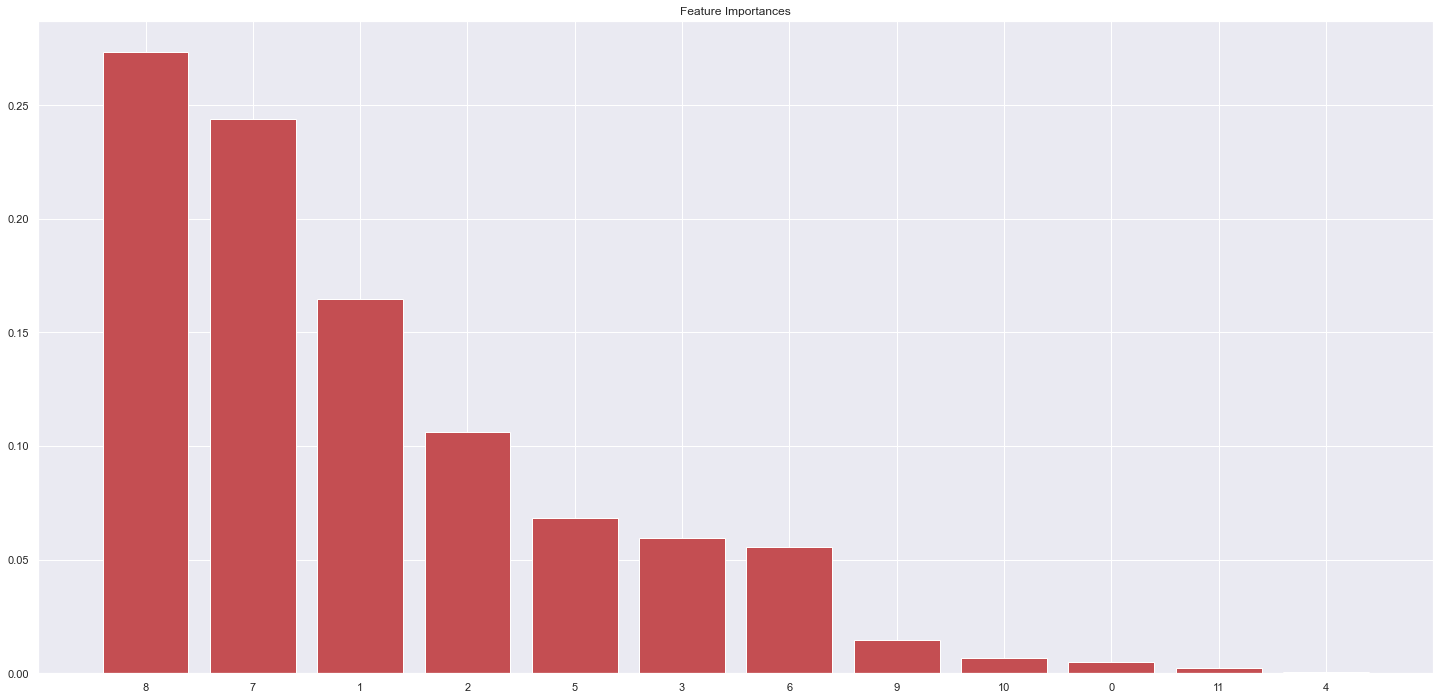

In [106]:
# plot the impurity-base feature importance of the forest
plt.figure()
plt.title('Feature Importances')
plt.bar(range(x_train_n.shape[1]), importances[indices], color='r', align='center')
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()

# 7. ML modelling

In [42]:
cols_selected = ['annual_premium', 'vintage', 'age', 'region_code', 'vehicle_damage', 'previously_insured', 'policy_sales_channel']
x_train = df5[cols_selected]
x_val = x_val[cols_selected]

### K Nearest Neighbors

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

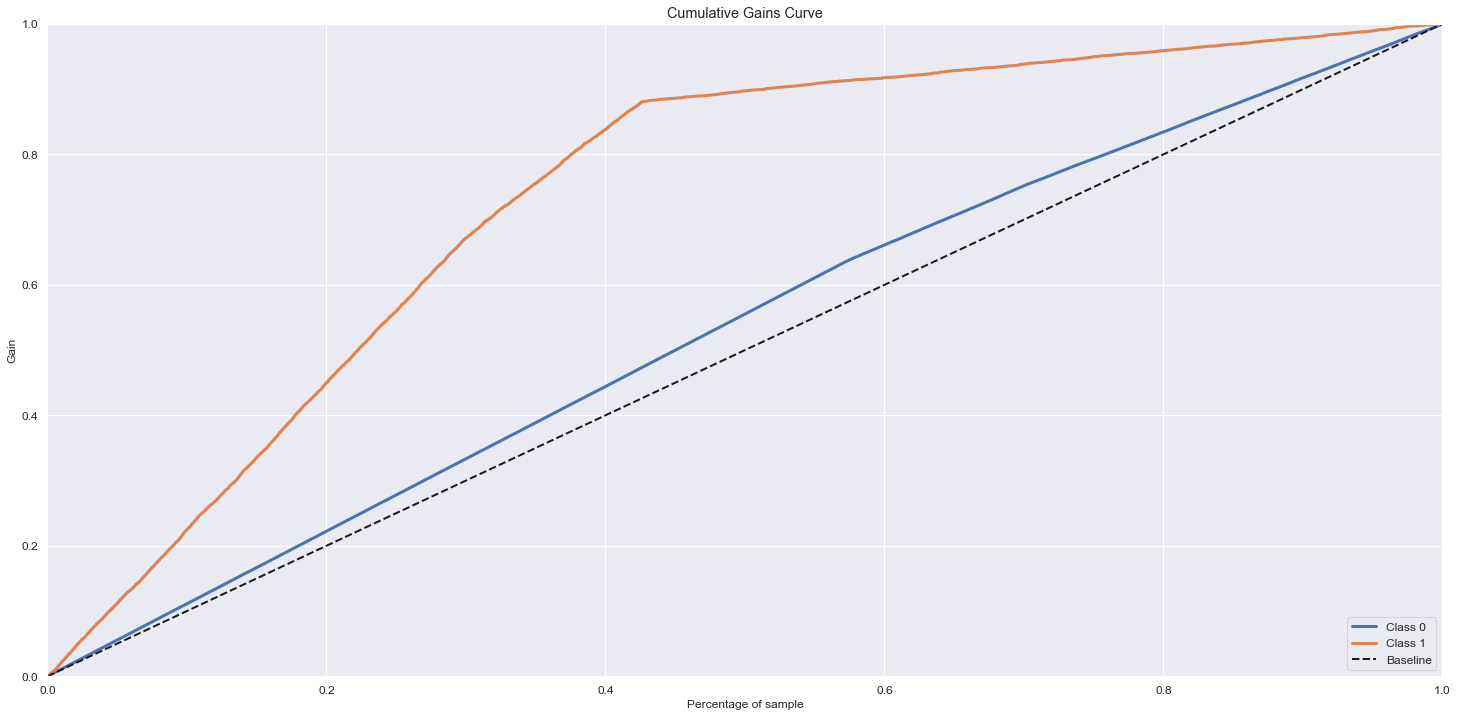

In [84]:
# KNN model 
# model definition
knn_model = nh.KNeighborsClassifier(n_neighbors=7)

# model training
knn_model.fit(x_train, y_train)

# model prediction
yhat_knn = knn_model.predict_proba(x_val)

# Accumulative gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_knn)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

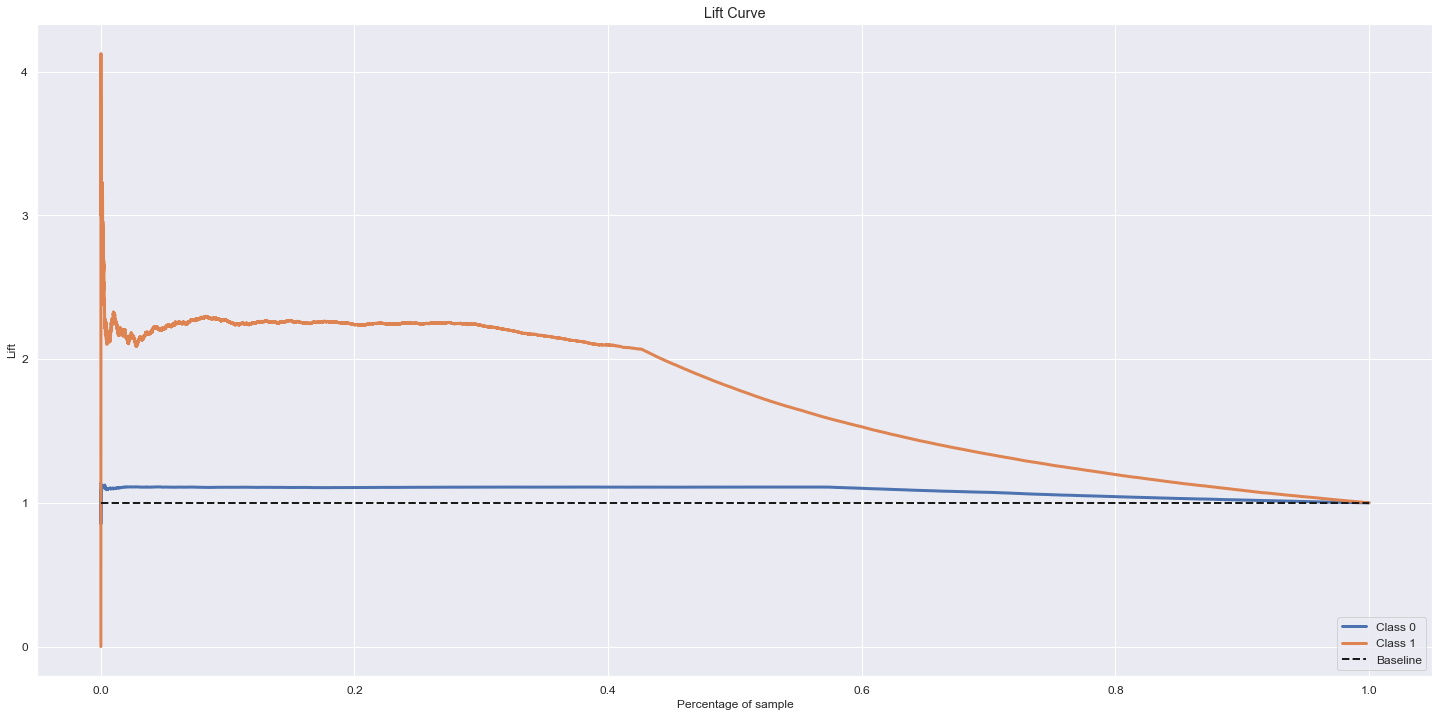

In [216]:
skplt.metrics.plot_lift_curve(y_val, yhat_knn)

### Logistic Regression

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

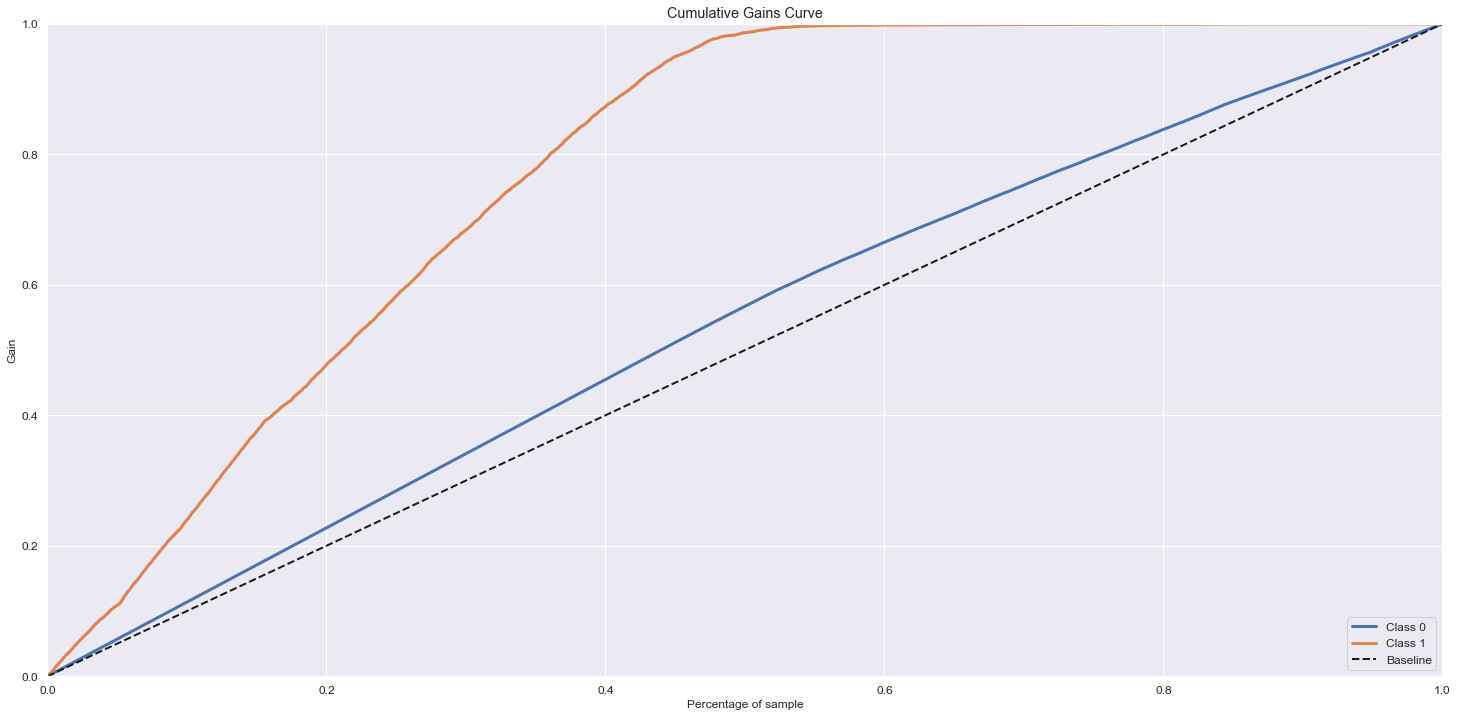

In [215]:
## Logistic Regression
# model definition
lr_model = lm.LogisticRegression(random_state=42)

# model training
lr_model.fit(x_train, y_train)

# model prediction
yhat_lr = lr_model.predict_proba(x_val)

# Accumulative gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_lr)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

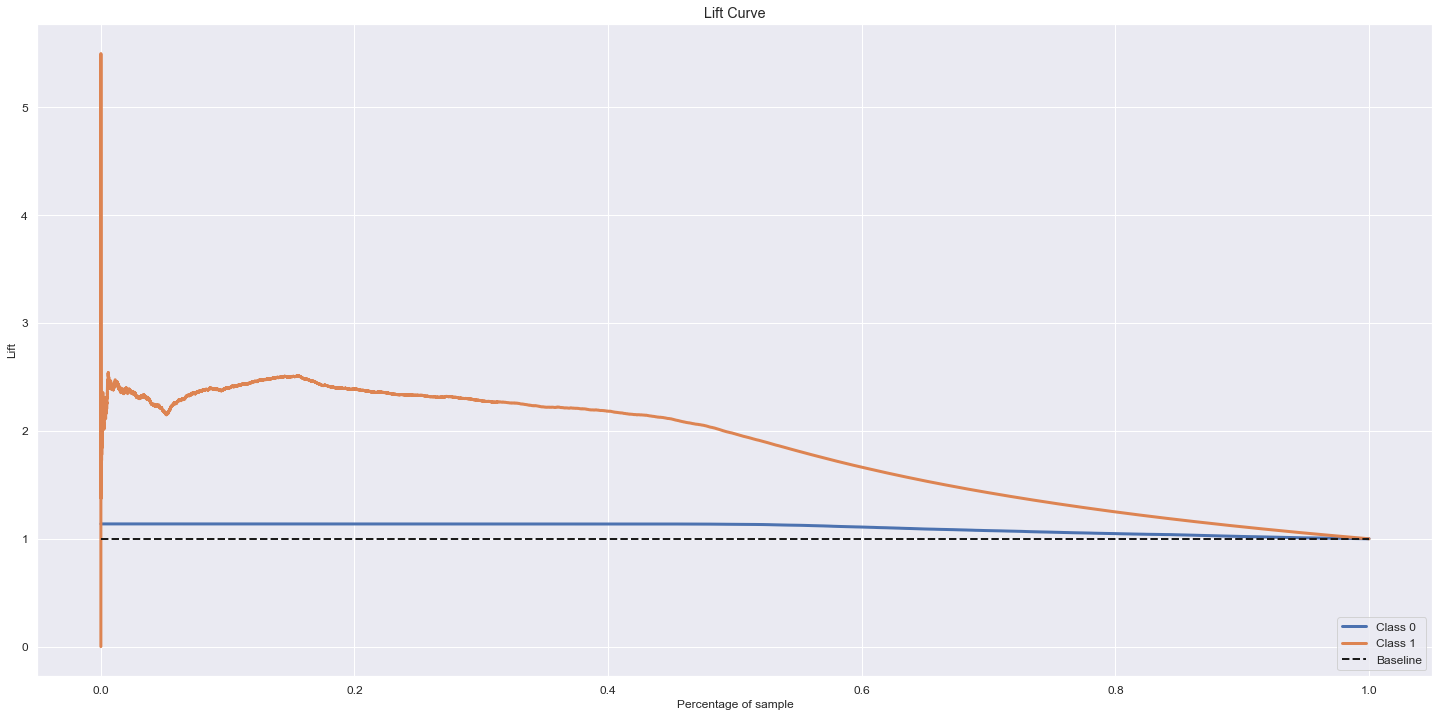

In [217]:
skplt.metrics.plot_lift_curve(y_val, yhat_lr)

### Extra Trees Classifier

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

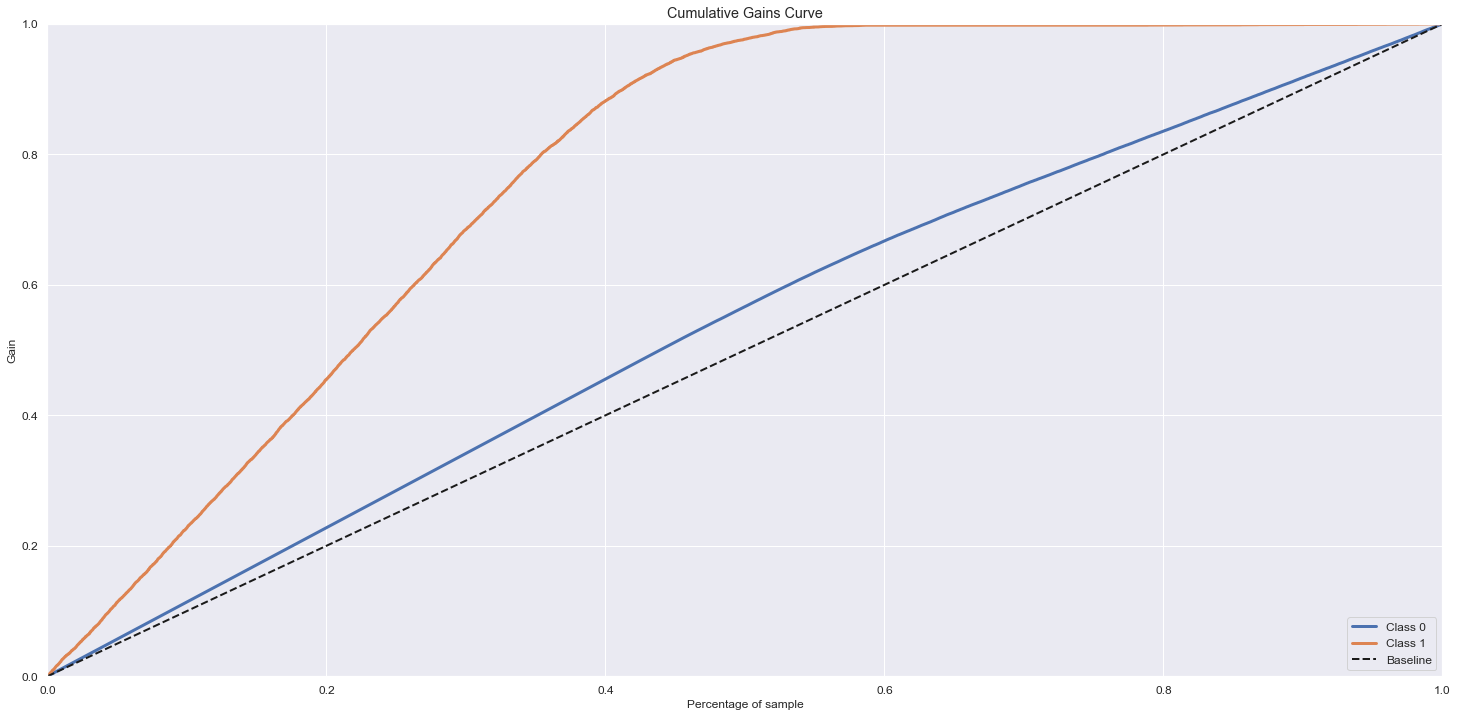

In [108]:
## Extra Trees Classifier
# model definition
et = en.ExtraTreesClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

# model training
et.fit(x_train, y_train)

# model prediction
yhat_et = et.predict_proba(x_val)

# Accumulative gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_et)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

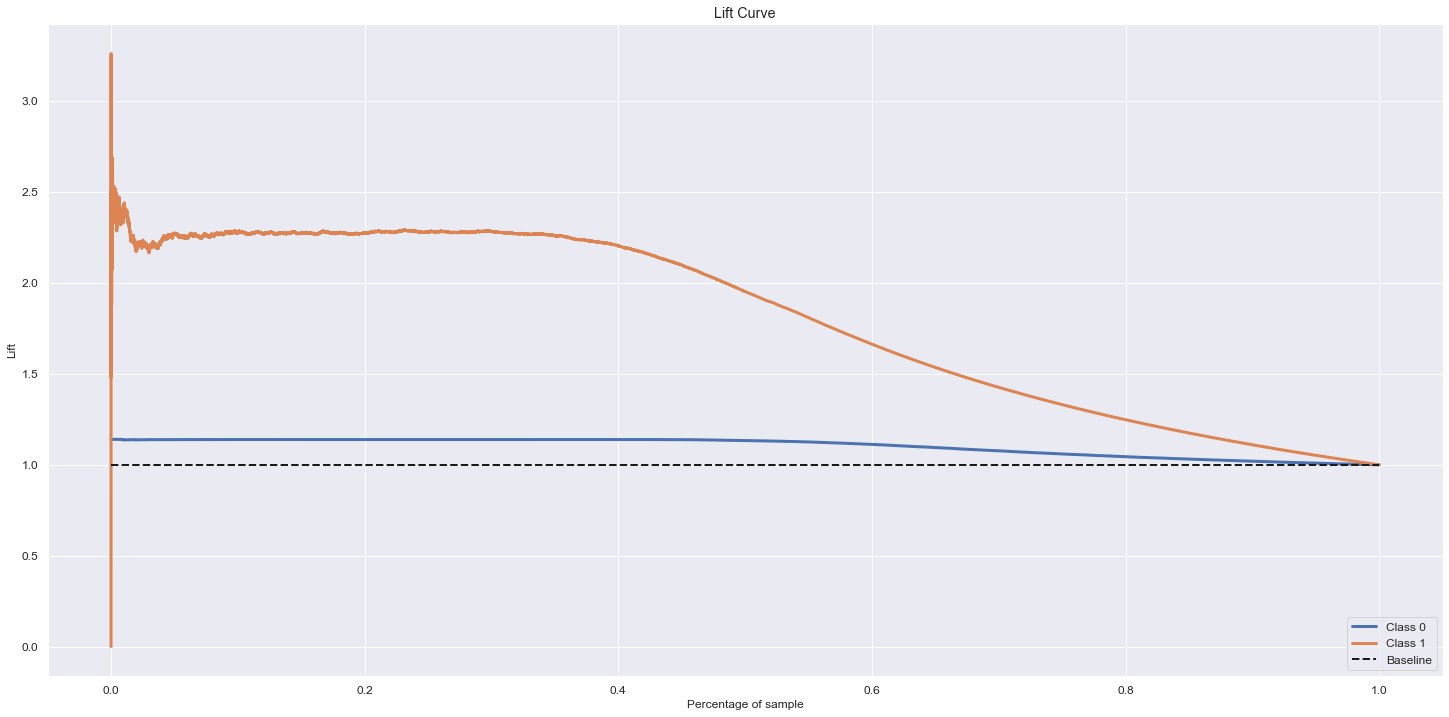

In [109]:
skplt.metrics.plot_lift_curve(y_val, yhat_et)

### Random Forest 

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

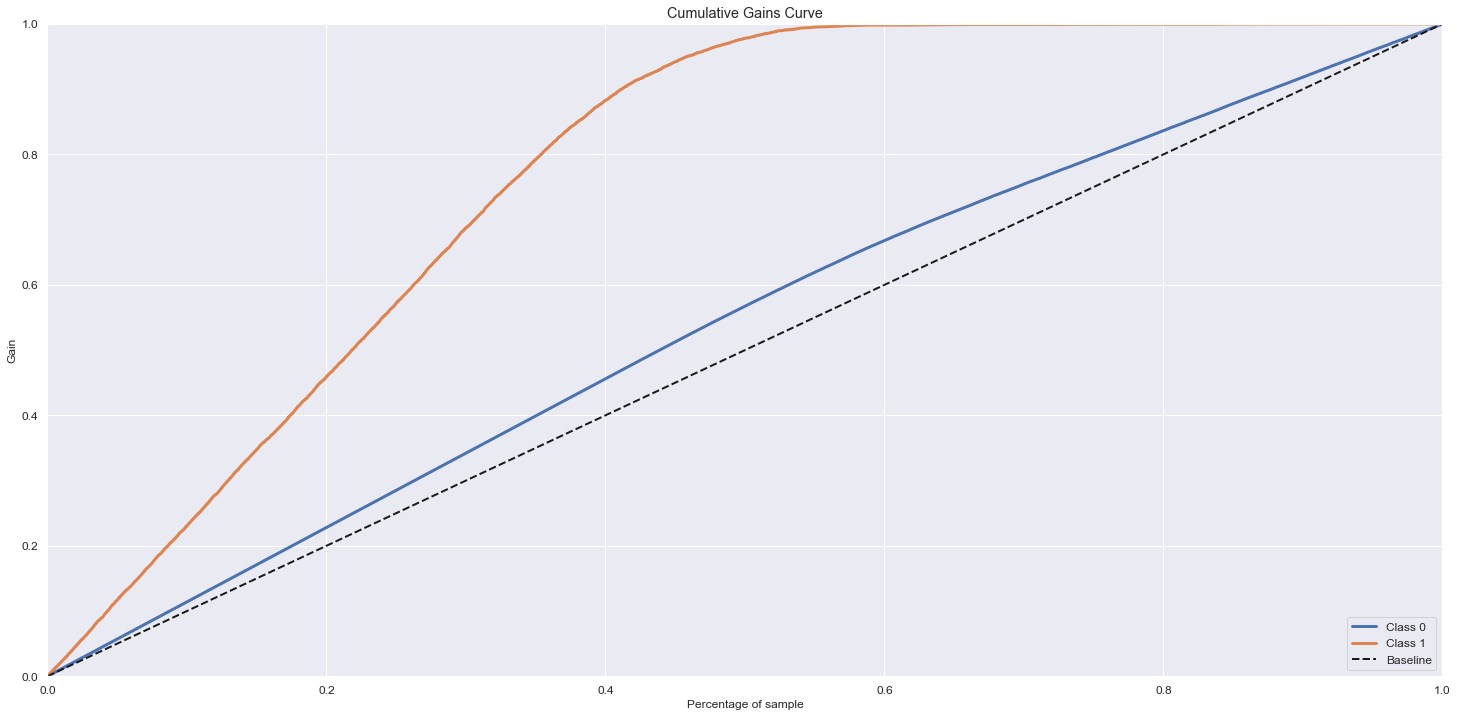

In [58]:
## Random Forest
# model definition
rf = en.RandomForestClassifier(n_estimators=2000, n_jobs=-1, random_state=42)

# model training
rf.fit(x_train, y_train)

# model prediction
yhat_rf = rf.predict_proba(x_val)

# Accumulative Gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_rf)

### Performance Metrics

In [117]:
def precision_at_k(data, k=10):
    data = data.reset_index(drop=True)
    
    # ranking
    data['ranking'] = data.index + 1
    
    # precision
    data['precision_at_k'] = data['response'].cumsum()/data['ranking']
    
    return (data.loc[k, 'recall_at_k'], data)

In [123]:
 def recall_at_k(data, k=15):
    data = data.reset_index(drop=True)
    
    # ranking
    data['ranking'] = data.index + 1
    
    # recall
    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()
    
    return (data.loc[k, 'recall_at_k'], data)

In [124]:
 # copy dataframe
df8 = x_val.copy()
df8['response'] = y_val.copy()

# propensity score
df8['score'] = yhat_et[:, 1].tolist()

# sort clients by propensity score
df8 = df8.sort_values('score', ascending=False)

# compute precision at k 
precision_at_20, data = precision_at_k(df8, k=10)

# compute recall at k
recall_at_15, data = recall_at_k(df8, k=15)

KeyError: 'recall_at_k'

In [ ]:
results = pd.DataFrame()
results['prediction'] = yhat_et[:1].tolist()
results['prediction']